# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучаем-данные-из-файла" data-toc-modified-id="Изучаем-данные-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучаем данные из файла</a></span><ul class="toc-item"><li><span><a href="#Изучим-информацию-о-датафрейме" data-toc-modified-id="Изучим-информацию-о-датафрейме-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучим информацию о датафрейме</a></span></li><li><span><a href="#Построим-гистограмму-для-каждого-столбца" data-toc-modified-id="Построим-гистограмму-для-каждого-столбца-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Построим гистограмму для каждого столбца</a></span></li></ul></li><li><span><a href="#Проводим-предобработку-данных" data-toc-modified-id="Проводим-предобработку-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Проводим предобработку данных</a></span><ul class="toc-item"><li><span><a href="#Исправим-наименования-столбцов" data-toc-modified-id="Исправим-наименования-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исправим наименования столбцов</a></span></li><li><span><a href="#Преобразуем-типы-данных-в-столбцах" data-toc-modified-id="Преобразуем-типы-данных-в-столбцах-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Преобразуем типы данных в столбцах</a></span></li><li><span><a href="#Поправим-наименования-населенных-пунктов" data-toc-modified-id="Поправим-наименования-населенных-пунктов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Поправим наименования населенных пунктов</a></span></li><li><span><a href="#Правка-столбца-с-балконами" data-toc-modified-id="Правка-столбца-с-балконами-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Правка столбца с балконами</a></span></li><li><span><a href="#Разберемся-с-высотой-потолков" data-toc-modified-id="Разберемся-с-высотой-потолков-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Разберемся с высотой потолков</a></span></li><li><span><a href="#Поправим-расстояние-до-аэропорта,-парков-и-прудов" data-toc-modified-id="Поправим-расстояние-до-аэропорта,-парков-и-прудов-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Поправим расстояние до аэропорта, парков и прудов</a></span></li><li><span><a href="#Стоимость-объектов-недвижимости" data-toc-modified-id="Стоимость-объектов-недвижимости-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Стоимость объектов недвижимости</a></span></li><li><span><a href="#Этажность-объектов-недвижимости" data-toc-modified-id="Этажность-объектов-недвижимости-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Этажность объектов недвижимости</a></span></li><li><span><a href="#Столбец-'living_area'" data-toc-modified-id="Столбец-'living_area'-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Столбец 'living_area'</a></span></li><li><span><a href="#Столбец-'is_apartment'" data-toc-modified-id="Столбец-'is_apartment'-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Столбец 'is_apartment'</a></span></li><li><span><a href="#Столбец-'kitchen_area'" data-toc-modified-id="Столбец-'kitchen_area'-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Столбец 'kitchen_area'</a></span></li><li><span><a href="#Разберемся-с-датой" data-toc-modified-id="Разберемся-с-датой-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>Разберемся с датой</a></span></li><li><span><a href="#Добавляем-цену-квадратного-метра" data-toc-modified-id="Добавляем-цену-квадратного-метра-2.13"><span class="toc-item-num">2.13&nbsp;&nbsp;</span>Добавляем цену квадратного метра</a></span></li><li><span><a href="#Добавляем-день-публикации" data-toc-modified-id="Добавляем-день-публикации-2.14"><span class="toc-item-num">2.14&nbsp;&nbsp;</span>Добавляем день публикации</a></span></li><li><span><a href="#Добавляем-столбец-с-порядковыми-номерами-дней-недели" data-toc-modified-id="Добавляем-столбец-с-порядковыми-номерами-дней-недели-2.15"><span class="toc-item-num">2.15&nbsp;&nbsp;</span>Добавляем столбец с порядковыми номерами дней недели</a></span></li><li><span><a href="#Добавляем-столбец-с-месяцем" data-toc-modified-id="Добавляем-столбец-с-месяцем-2.16"><span class="toc-item-num">2.16&nbsp;&nbsp;</span>Добавляем столбец с месяцем</a></span></li><li><span><a href="#Добавляем-столбец-с-годом" data-toc-modified-id="Добавляем-столбец-с-годом-2.17"><span class="toc-item-num">2.17&nbsp;&nbsp;</span>Добавляем столбец с годом</a></span></li><li><span><a href="#Добавим-тип-этажа" data-toc-modified-id="Добавим-тип-этажа-2.18"><span class="toc-item-num">2.18&nbsp;&nbsp;</span>Добавим тип этажа</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.19"><span class="toc-item-num">2.19&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Проводим-исследовательский-анализ-данных" data-toc-modified-id="Проводим-исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проводим исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Определите-факторы,-которые-больше-всего-влияют-на-общую-(полную)-стоимость-объекта».-Построены-графики,-которые-показывают-зависимость-цены-от-параметров:" data-toc-modified-id="Определите-факторы,-которые-больше-всего-влияют-на-общую-(полную)-стоимость-объекта».-Построены-графики,-которые-показывают-зависимость-цены-от-параметров:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:</a></span></li><li><span><a href="#Общая-площадь" data-toc-modified-id="Общая-площадь-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Общая площадь</a></span></li><li><span><a href="#Рассмотрим-жилую-площадь" data-toc-modified-id="Рассмотрим-жилую-площадь-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Рассмотрим жилую площадь</a></span><ul class="toc-item"><li><span><a href="#Строим-гистограмму" data-toc-modified-id="Строим-гистограмму-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Строим гистограмму</a></span></li></ul></li><li><span><a href="#Площадь-кухни" data-toc-modified-id="Площадь-кухни-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Площадь кухни</a></span></li><li><span><a href="#Стоимость-объекта" data-toc-modified-id="Стоимость-объекта-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Стоимость объекта</a></span></li><li><span><a href="#Количество-комнат" data-toc-modified-id="Количество-комнат-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Количество комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Тип-этажа-квартиры-(«первый»,-«последний»,-«другой»);" data-toc-modified-id="Тип-этажа-квартиры-(«первый»,-«последний»,-«другой»);-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Тип этажа квартиры («первый», «последний», «другой»);</a></span></li><li><span><a href="#Общее-количество-этажей-в-доме" data-toc-modified-id="Общее-количество-этажей-в-доме-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Общее количество этажей в доме</a></span></li><li><span><a href="#Расстояние-до-центра-города-в-метрах" data-toc-modified-id="Расстояние-до-центра-города-в-метрах-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Расстояние до центра города в метрах</a></span></li><li><span><a href="#Расстояние-до-ближайшего-парка" data-toc-modified-id="Расстояние-до-ближайшего-парка-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>Расстояние до ближайшего парка</a></span></li><li><span><a href="#Определите-факторы,-которые-больше-всего-влияют-на-общую-(полную)-стоимость-объекта».-Построены-графики,-которые-показывают-зависимость-цены-от-параметров:" data-toc-modified-id="Определите-факторы,-которые-больше-всего-влияют-на-общую-(полную)-стоимость-объекта».-Построены-графики,-которые-показывают-зависимость-цены-от-параметров:-3.12"><span class="toc-item-num">3.12&nbsp;&nbsp;</span>Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:</a></span></li><li><span><a href="#Посчитайте-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений:" data-toc-modified-id="Посчитайте-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений:-3.13"><span class="toc-item-num">3.13&nbsp;&nbsp;</span>Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:</a></span></li><li><span><a href="#Выделите-квартиры-в-Санкт-Петербурге-с-помощью-столбца-locality_name-и-вычислите-их-среднюю-стоимость-на-разном-удалении-от-центра" data-toc-modified-id="Выделите-квартиры-в-Санкт-Петербурге-с-помощью-столбца-locality_name-и-вычислите-их-среднюю-стоимость-на-разном-удалении-от-центра-3.14"><span class="toc-item-num">3.14&nbsp;&nbsp;</span>Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра</a></span></li><li><span><a href="#Посмотрим,-есть-ли-зависимость-для-стоимости-однокомнатных-квартир-от-расстояния-до-центра" data-toc-modified-id="Посмотрим,-есть-ли-зависимость-для-стоимости-однокомнатных-квартир-от-расстояния-до-центра-3.15"><span class="toc-item-num">3.15&nbsp;&nbsp;</span>Посмотрим, есть ли зависимость для стоимости однокомнатных квартир от расстояния до центра</a></span></li><li><span><a href="#Средняя-стоиомсть-квадратного-метра,-если-объект-является-апартаментами-и-не-является" data-toc-modified-id="Средняя-стоиомсть-квадратного-метра,-если-объект-является-апартаментами-и-не-является-3.16"><span class="toc-item-num">3.16&nbsp;&nbsp;</span>Средняя стоиомсть квадратного метра, если объект является апартаментами и не является</a></span></li></ul></li><li><span><a href="#Пишем-выводы" data-toc-modified-id="Пишем-выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Пишем выводы</a></span><ul class="toc-item"><li><span><a href="#Подсказки" data-toc-modified-id="Подсказки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Подсказки</a></span></li></ul></li></ul></div>

## Изучаем данные из файла

In [1]:
#Посмотрим на файл для задачи
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
df=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
#Посмотрим на хвостик датафрейма
display(df.tail(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Изучим информацию о датафрейме 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
#Смотрим, в каких столбцах у нас отсутствуют данные
empty_values=df.isnull().sum()
print(empty_values)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Наблюдается много пропусков, с которыми в дальнейшем будем работать

In [6]:
#Проверим датафрейм на наличие дубликатов
df.duplicated().sum()

0

In [7]:
#Посмотрим на общую информацию по датафрейму
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Построим гистограмму для каждого столбца

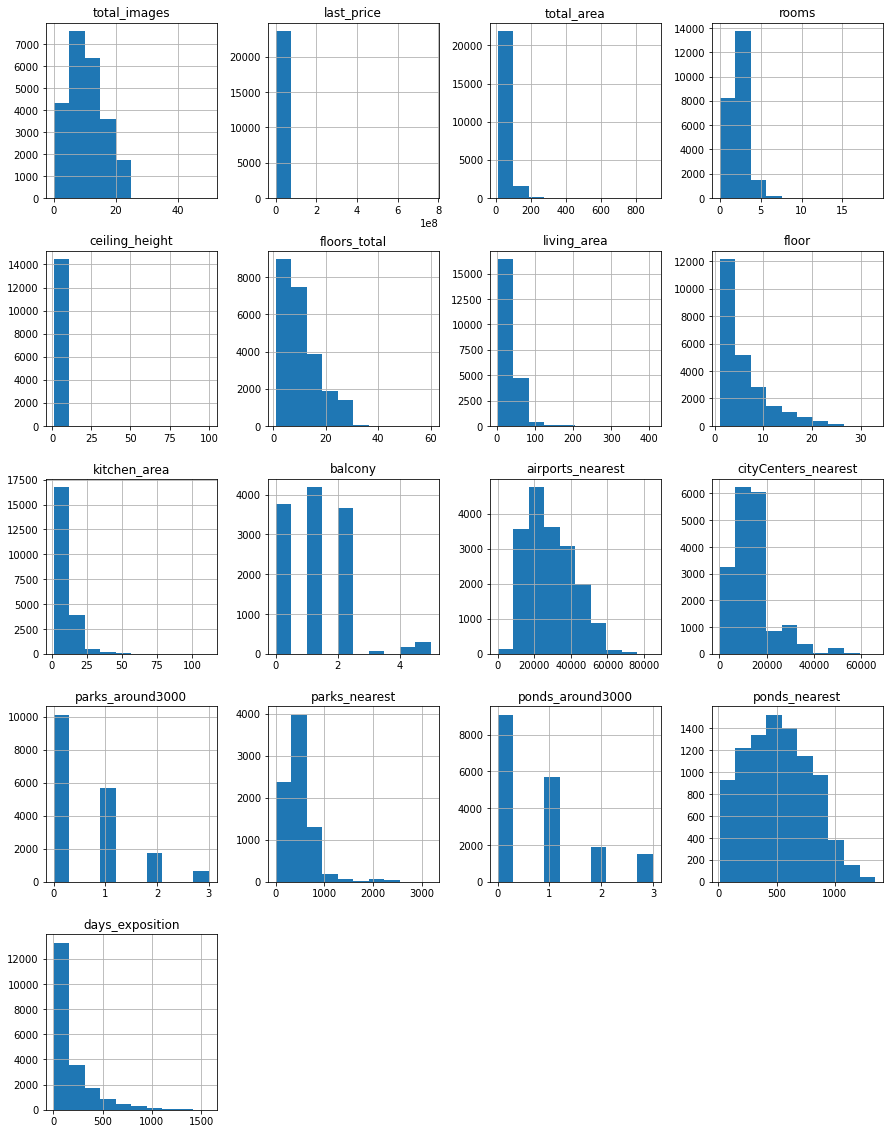

In [8]:
df.hist(figsize=(15, 20));

Кажется, что ничего необычного не наблюдается, в целом, похожк на правду

Явных дубликатов тоже не наблюдается

# Выводы:
    1) Отсутствует большое количество данных
    2) Кроме стоимости. Не указать стоимость при продаже недвижимости - грех :)
    3) Удивительно, что даже этажи не поленились внести :)
    4) 2 столбца - это булевы массивы. Апартамены, кстати, тоже являются булевым массивом, но пока там написано object. Это тоже надо будет поправить
    5)Заголовки столбцов написаны некорректно
    6)Нет унифицированного названия locality_name - названия населенных пунктов занесены как попало
    7) Всего 23699 строк и 21 столбец
    8) Есть значения, которые проставляются автоматически системой при вносе адреса объекта, что-то пользователь вносит вручно: этаж, количество балконов, высоту потолков, этажность дома.
    
    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении
    

## Проводим предобработку данных

### Исправим наименования столбцов

In [9]:
right_columns=['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest_km',
 'city_centers_nearest_m',
 'parks_around_3km',
 'parks_nearest_km',
 'ponds_around_3km',
 'ponds_nearest_km',
 'days_exposition'  
    
]
df.set_axis(right_columns, axis=1, inplace=True)

In [10]:
df.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest_km',
 'city_centers_nearest_m',
 'parks_around_3km',
 'parks_nearest_km',
 'ponds_around_3km',
 'ponds_nearest_km',
 'days_exposition']

Привели в соответсвтие правилами

Посмотрим доли пропущенных значений

In [11]:
empty_values/df.shape[0]*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Наибольшее количество пропусков наблюдается в стобцах is_apartment - 88 это может указывать на пропуски в стобцах, что значит, что 88 процентов квартир - это жилая недвижимость
parks_nearest  
ponds_nearest
Возможно просто некоторые объекты расположены в удалении от парков и водоемов
Осталные ниже 50 процентов


In [12]:
#Снова глянем на данные и в каком формате они у нас представляются
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest_km,city_centers_nearest_m,parks_around_3km,parks_nearest_km,ponds_around_3km,ponds_nearest_km,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Преобразуем типы данных в столбцах

In [13]:
df['is_apartment'] = df['is_apartment'].astype(bool)
# можно оставить булево значение

In [14]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], errors='coerce')
#дату выставления объявления переведем в формат даты

In [15]:
#снова посмотрим на результаты наших действий
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  float64       
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          14504 non-null  float64       
 6   floors_total            23613 non-null  float64       
 7   living_area             21796 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            23699 non-null  bool          
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float6

Переходим к следующей задаче. Можно перейти к добавлению данных. 
Первое и самое простое, что бросается в глаза - это унификация населенных пунктов. Находим уникальные названия

### Поправим наименования населенных пунктов

In [16]:
unique_locations=df['locality_name'].unique()
print(unique_locations)

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [17]:
#Заменим букву ё на е
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Ё заменили

In [18]:
#Посмотрим на уникальные значения
unique_purpose=df['locality_name'].unique()
print(unique_purpose)

['Санкт-Петербург' 'поселок Шушары' 'городской поселок Янино-1'
 'поселок Парголово' 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'деревня Федоровское'
 'Выборг' 'Кронштадт' 'Кировск' 'деревня Новое Девяткино'
 'поселок Металлострой' 'поселок городского типа Лебяжье'
 'поселок городского типа Сиверский' 'поселок Молодцово'
 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок городского типа Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'

Что с этим делать, пока неясно. Думаю дальше еще вернусь к исправлению

### Правка столбца с балконами

In [19]:
df['balcony'] = df['balcony'].fillna(value='0')

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

In [20]:
print(df['balcony'].head(5))

0      0
1    2.0
2    0.0
3    0.0
4      0
Name: balcony, dtype: object


In [21]:
df['balcony'] = df['balcony'].astype(int)
print(df['balcony'].head(5))
#решила, что десятичные дроби тут невозможны

0    0
1    2
2    0
3    0
4    0
Name: balcony, dtype: int64


Поправили вид и тип столбца "балконы"

### Разберемся с высотой потолков

In [22]:
df['ceiling_height'].max()

100.0

In [23]:
max_index = df['ceiling_height'].idxmax()
max_height_row = df.loc[max_index]
print(max_height_row)

total_images                                0
last_price                         15000000.0
total_area                               25.0
first_day_exposition      2018-07-25 00:00:00
rooms                                       1
ceiling_height                          100.0
floors_total                              5.0
living_area                              14.0
floor                                       5
is_apartment                             True
studio                                  False
open_plan                               False
kitchen_area                             11.0
balcony                                     5
locality_name                 Санкт-Петербург
airports_nearest_km                   34963.0
city_centers_nearest_m                 8283.0
parks_around_3km                          1.0
parks_nearest_km                        223.0
ponds_around_3km                          3.0
ponds_nearest_km                         30.0
days_exposition                   

 Я не думаю, что это какая-то ошибка, можеть быть высота потолков должны быть 10 метров, тогда это точно. будет башня)))

In [24]:
#отсортируем столбец, чтобы увидеть самые большие значения
df.sort_values(by='ceiling_height', ascending=False) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest_km,city_centers_nearest_m,parks_around_3km,parks_nearest_km,ponds_around_3km,ponds_nearest_km,days_exposition
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,...,11.0,5,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22336,19,9999000.0,92.4,2019-04-05,2,32.0,6.0,55.5,5,False,...,16.5,4,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,True,...,8.0,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21377,19,4900000.0,42.0,2017-04-18,1,27.5,24.0,37.7,19,False,...,11.0,2,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
20478,11,8000000.0,45.0,2017-07-18,1,27.0,4.0,22.0,2,True,...,10.0,1,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.0,2017-12-16,1,NaN,9.0,20.0,6,True,...,11.0,2,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5500000.0,52.0,2018-07-19,2,NaN,5.0,31.0,2,True,...,6.0,0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.0,2017-07-07,1,NaN,5.0,17.5,4,True,...,6.0,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15,3,NaN,5.0,38.0,4,True,...,8.5,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Вряд ли столько зданий с высокими потолками, скорее всего пользователи указывали высоту в сантиметрах, допускаю это, поэтому, разделим на 10 все значения от 22,6 до 100

In [25]:
df.loc[(df['ceiling_height'] >= 14) & (df['ceiling_height'] <= 101), 'ceiling_height'] = df['ceiling_height'] / 10
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median()) 
print(df['ceiling_height'].describe())

count    23699.000000
mean         2.698189
std          0.242478
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.300000
Name: ceiling_height, dtype: float64


In [26]:
df.sort_values(by='ceiling_height', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest_km,city_centers_nearest_m,parks_around_3km,parks_nearest_km,ponds_around_3km,ponds_nearest_km,days_exposition
22309,20,5300000.0,45.0,2017-09-30,1,10.30,16.0,15.5,15,True,...,NaN,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22869,0,15000000.0,25.0,2018-07-25,1,10.00,5.0,14.0,5,True,...,11.00,5,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
5863,20,5650000.0,45.0,2018-08-15,1,8.30,16.0,19.3,14,True,...,8.30,1,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
17442,0,5350000.0,54.0,2015-06-16,2,8.00,5.0,29.0,2,True,...,NaN,1,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
3474,3,1400000.0,30.0,2018-03-16,1,8.00,5.0,15.3,2,False,...,7.30,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20520,9,3600000.0,38.0,2018-07-05,1,2.00,12.0,15.0,9,True,...,11.80,1,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,62.0
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37.0,17.4,5,True,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
15061,19,5600000.0,56.4,2018-05-11,2,1.40,14.0,32.4,5,True,...,9.10,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2.0,27.5,1,True,...,5.20,0,городской поселок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0


На данном этапе поправили и унифицировали высоту потолков

### Поправим расстояние до аэропорта, парков и прудов

Теперь поделим на 1000 всё, что может быть поделено на 1000, это необходимо для простоты отображения информации.
Столбцы 'airports_nearest_km' 'airports_nearest' 'ponds_around_3km'
Параллельно обновим названия столбцов, чтобы никого не путать.

In [27]:
df[['airports_nearest_km']] = df[['airports_nearest_km']] / 1000
#df[['city_centers_nearest_km']] = df[['city_centers_nearest_km']] / 1000 - этого делать не будем, так как дальше в задании нам нужны метры
df[['parks_nearest_km']] = df[['parks_nearest_km']] / 1000
df[['ponds_nearest_km']] = df[['ponds_nearest_km']] / 1000
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest_km,city_centers_nearest_m,parks_around_3km,parks_nearest_km,ponds_around_3km,ponds_nearest_km,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,25.0,0,Санкт-Петербург,18.863,16028.0,1.0,0.482,2.0,0.755,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,11.0,2,поселок Шушары,12.817,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,8.3,0,Санкт-Петербург,21.741,13933.0,1.0,0.090,2.0,0.574,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,NaN,0,Санкт-Петербург,28.098,6800.0,2.0,0.084,3.0,0.234,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,41.0,0,Санкт-Петербург,31.856,8098.0,2.0,0.112,1.0,0.048,121.0


### Стоимость объектов недвижимости

Предлагаю исчислять стоимость в миллионах руб. Для этого разделим столбец на 1000000

In [28]:
df['last_price'] = df['last_price']/1000000
print(df['last_price'].head(10))

0    13.000
1     3.350
2     5.196
3    64.900
4    10.000
5     2.890
6     3.700
7     7.915
8     2.900
9     5.400
Name: last_price, dtype: float64


Мы поправили значения в столбцах со стоимостью и удаленностью. Осталось обработать:

    floors_total
    living_area
    is_apartment
    kitchen_area
    parks_around3000	
    parks_nearest	
    ponds_around3000	
    ponds_nearest	
    days_exposition
    total_images             
    

### Этажность объектов недвижимости

In [29]:
#Посмотрим, что есть
display(df.sort_values(by='floors_total', ascending=False).head(30))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest_km,city_centers_nearest_m,parks_around_3km,parks_nearest_km,ponds_around_3km,ponds_nearest_km,days_exposition
2253,12,3.800000,45.5,2018-06-28,2,2.88,60.0,27.4,4,True,...,7.40,0,Кронштадт,67.763,49488.0,2.0,0.342,3.0,0.614,166.0
16731,9,3.978000,40.0,2018-09-24,1,2.65,52.0,10.5,18,True,...,14.00,0,Санкт-Петербург,20.728,12978.0,1.0,0.793,0.0,NaN,45.0
16934,5,4.100000,40.0,2017-10-17,1,1.75,37.0,17.4,5,True,...,8.34,0,Санкт-Петербург,18.732,20444.0,0.0,NaN,3.0,0.080,71.0
397,15,5.990000,54.0,2018-03-22,2,2.65,36.0,21.4,28,True,...,18.70,1,Санкт-Петербург,18.732,20444.0,0.0,NaN,3.0,0.080,11.0
5807,17,8.150000,80.0,2019-01-09,2,2.70,36.0,41.0,13,True,...,12.00,5,Санкт-Петербург,18.732,20444.0,0.0,NaN,3.0,0.080,38.0
11079,16,9.200000,75.0,2019-02-22,2,2.70,36.0,40.0,29,True,...,12.00,2,Санкт-Петербург,18.732,20444.0,0.0,NaN,3.0,0.080,NaN
4855,12,5.500000,50.0,2017-06-22,1,2.80,35.0,22.0,4,True,...,13.00,0,Санкт-Петербург,18.627,20339.0,1.0,0.609,3.0,0.145,537.0
18617,8,7.350000,68.5,2017-10-09,2,2.65,35.0,27.0,3,True,...,23.00,1,Санкт-Петербург,18.627,20339.0,1.0,0.609,3.0,0.145,41.0
5808,12,4.590000,43.0,2018-10-19,1,2.65,35.0,14.0,11,True,...,15.00,0,Санкт-Петербург,18.732,20444.0,0.0,NaN,3.0,0.080,82.0
13975,19,6.990000,65.0,2018-10-06,2,2.65,35.0,32.1,23,True,...,8.90,0,Санкт-Петербург,18.732,20444.0,0.0,NaN,3.0,0.080,89.0


Самый высокий ЖК в СПб- это некий Лидер-Тауэр, который составляет 37 этаже

Заполним этажи. Для этого разобъем значения стобца floor на промежутки (1):
    от 1 до 5
    от 6 до 10
    от 11 до 20
    от 21 до 30
    от 31 до 38
Далее (2) напишем цикл для подстановки значений.

In [30]:
#вычисляем медианы
median_1_5 = df.loc[(df['floor'] >= 1) & (df['floor'] <= 5), 'floors_total'].median()
median_6_10 = df.loc[(df['floor'] >= 6) & (df['floor'] <= 10), 'floors_total'].median()
median_11_20 = df.loc[(df['floor'] >= 11) & (df['floor'] <= 20), 'floors_total'].median()
median_21_30 = df.loc[(df['floor'] >= 21) & (df['floor'] <= 30), 'floors_total'].median()
median_31_37 = df.loc[(df['floor'] >= 31) & (df['floor'] <= 37), 'floors_total'].median()

In [31]:
#создаем цикл для подстановки значений
for index, row in df.iterrows():
    if pd.isnull(row['floors_total']):  # проверяем на пропуск
        if 1 <= row['floor'] <= 5:
            df.at[index, 'floors_total'] = median_1_5
        elif 6 <= row['floor'] <= 10:
            df.at[index, 'floors_total'] = median_6_10
        elif 11 <= row['floor'] <= 20:
            df.at[index, 'floors_total'] = median_11_20
        elif 21 <= row['floor'] <= 30:
            df.at[index, 'floors_total'] = median_21_30
        elif 31 <= row['floor'] <= 37:
            df.at[index, 'floors_total'] = median_31_37
display(df.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest_km,city_centers_nearest_m,parks_around_3km,parks_nearest_km,ponds_around_3km,ponds_nearest_km,days_exposition
0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,...,25.00,0,Санкт-Петербург,18.863,16028.0,1.0,0.482,2.0,0.755,NaN
1,7,3.350,40.40,2018-12-04,1,2.65,11.0,18.60,1,True,...,11.00,2,поселок Шушары,12.817,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5.196,56.00,2015-08-20,2,2.65,5.0,34.30,4,True,...,8.30,0,Санкт-Петербург,21.741,13933.0,1.0,0.090,2.0,0.574,558.0
3,0,64.900,159.00,2015-07-24,3,2.65,14.0,NaN,9,True,...,NaN,0,Санкт-Петербург,28.098,6800.0,2.0,0.084,3.0,0.234,424.0
4,2,10.000,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,...,41.00,0,Санкт-Петербург,31.856,8098.0,2.0,0.112,1.0,0.048,121.0
5,10,2.890,30.40,2018-09-10,1,2.65,12.0,14.40,5,True,...,9.10,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3.700,37.30,2017-11-02,1,2.65,26.0,10.60,6,True,...,14.40,1,поселок Парголово,52.996,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7.915,71.60,2019-04-18,2,2.65,24.0,NaN,22,True,...,18.90,2,Санкт-Петербург,23.982,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2.900,33.16,2018-05-23,1,2.65,27.0,15.43,26,True,...,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5.400,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,...,6.50,2,Санкт-Петербург,50.898,15008.0,0.0,NaN,0.0,NaN,289.0


In [32]:
df['floors_total'].isnull().sum()

0

я плачу, девочки) У нас получилось заполнить этажи с помощью цикла. Путь долгий и очень кропотливый для меня
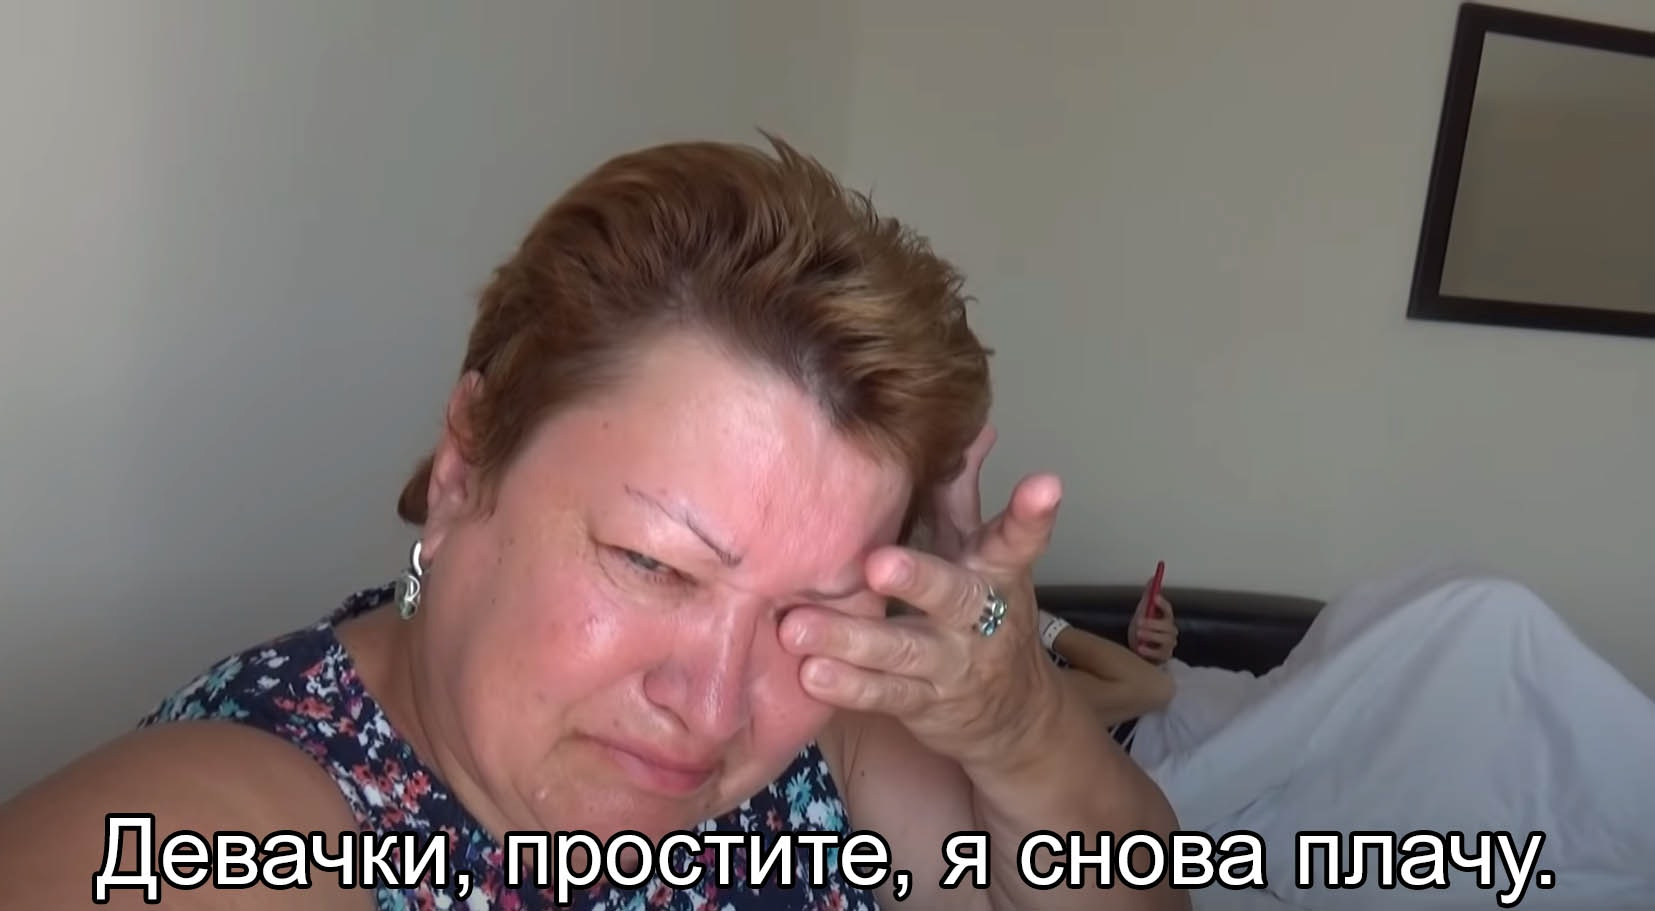

### Столбец 'living_area'


Вспоминаем, сколько здесь пропусков:
    living_area-- 8.029875
Пропусков достаточно. 
Заполнение пустых ячеек предлагается выполнить так же как и в предыдущем шаге -- с применением циклов.
Для этого мы будем опираться на данные о количестве комнат в объектах. 
    

In [33]:
print(df.sort_values(by='rooms', ascending=True).head(30))

       total_images  last_price  total_area first_day_exposition  rooms  \
9412              5       2.100       16.00           2017-12-10      0   
8886             10       2.450       15.50           2018-08-22      0   
18132             6       4.800       32.50           2019-04-09      0   
20002             8       2.700       28.00           2017-11-10      0   
21425             4       2.700       25.70           2018-01-01      0   
12229            12       6.200       32.40           2018-02-22      0   
3019             18       2.100       24.00           2017-11-10      0   
2532              5       3.500       27.10           2018-02-01      0   
22047             0       3.400       24.00           2017-05-31      0   
2727              4       3.670       26.49           2018-07-26      0   
20648             8       3.400       23.00           2017-11-14      0   
1625              7       1.980       23.98           2018-02-01      0   
22416             5      

In [34]:
#если студия- то точно комнат нет, это 0
df.loc[df['studio'] == True, 'rooms'] = 0 

In [35]:
#вычисляем медианы
lv_median_0 = df.loc[(df['rooms'] >= 0) & (df['rooms'] <= 0), 'living_area'].median()
lv_median_1 = df.loc[(df['rooms'] >= 1) & (df['rooms'] <= 1), 'living_area'].median()
lv_median_2 = df.loc[(df['rooms'] >= 2) & (df['rooms'] <= 2), 'living_area'].median()
lv_median_3_5 = df.loc[(df['rooms'] >= 3) & (df['rooms'] <= 5), 'living_area'].median()
lv_median_6_20 = df.loc[(df['rooms'] >= 6) & (df['rooms'] <= 20), 'living_area'].median() #коммуналки и маленькие отели


In [36]:
#создаем цикл для подстановки значений
for index, row in df.iterrows():
    if pd.isnull(row['living_area']):  # проверяем на пропуск
        if 0 <= row['rooms'] <= 0:
            df.at[index, 'living_area'] = lv_median_0
        elif 1 <= row['rooms'] <= 1:
            df.at[index, 'living_area'] = lv_median_1
        elif 2 <= row['rooms'] <= 2:
            df.at[index, 'living_area'] = lv_median_2
        elif 3 <= row['rooms'] <= 5:
            df.at[index, 'living_area'] = lv_median_3_5
        elif 6 <= row['rooms'] <= 20:
            df.at[index, 'living_area'] = lv_median_6_20
display(df.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest_km,city_centers_nearest_m,parks_around_3km,parks_nearest_km,ponds_around_3km,ponds_nearest_km,days_exposition
0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,...,25.00,0,Санкт-Петербург,18.863,16028.0,1.0,0.482,2.0,0.755,NaN
1,7,3.350,40.40,2018-12-04,1,2.65,11.0,18.60,1,True,...,11.00,2,поселок Шушары,12.817,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5.196,56.00,2015-08-20,2,2.65,5.0,34.30,4,True,...,8.30,0,Санкт-Петербург,21.741,13933.0,1.0,0.090,2.0,0.574,558.0
3,0,64.900,159.00,2015-07-24,3,2.65,14.0,47.00,9,True,...,NaN,0,Санкт-Петербург,28.098,6800.0,2.0,0.084,3.0,0.234,424.0
4,2,10.000,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,...,41.00,0,Санкт-Петербург,31.856,8098.0,2.0,0.112,1.0,0.048,121.0
5,10,2.890,30.40,2018-09-10,1,2.65,12.0,14.40,5,True,...,9.10,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3.700,37.30,2017-11-02,1,2.65,26.0,10.60,6,True,...,14.40,1,поселок Парголово,52.996,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7.915,71.60,2019-04-18,2,2.65,24.0,30.50,22,True,...,18.90,2,Санкт-Петербург,23.982,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2.900,33.16,2018-05-23,1,2.65,27.0,15.43,26,True,...,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5.400,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,...,6.50,2,Санкт-Петербург,50.898,15008.0,0.0,NaN,0.0,NaN,289.0


In [37]:
#Проверим на наличие пропусков
df['living_area'].isnull().sum()

0

На карте данных о недвижимости стало еще меньше белых пятен 

### Столбец 'is_apartment'

Напомним долю пропущенных значений в данном столбце:
    is_apartment            88.290645
    Можно считать, что если пользователь не отметил в объявлении True, то скорее всего к апартаментам этот тип недвижимости не относится.
    Заполним строки в соответствии с этим утверждением.

In [38]:
df['is_apartment'] = df['is_apartment'].fillna(value=False)
display(df.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest_km,city_centers_nearest_m,parks_around_3km,parks_nearest_km,ponds_around_3km,ponds_nearest_km,days_exposition
0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,...,25.00,0,Санкт-Петербург,18.863,16028.0,1.0,0.482,2.0,0.755,NaN
1,7,3.350,40.40,2018-12-04,1,2.65,11.0,18.60,1,True,...,11.00,2,поселок Шушары,12.817,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5.196,56.00,2015-08-20,2,2.65,5.0,34.30,4,True,...,8.30,0,Санкт-Петербург,21.741,13933.0,1.0,0.090,2.0,0.574,558.0
3,0,64.900,159.00,2015-07-24,3,2.65,14.0,47.00,9,True,...,NaN,0,Санкт-Петербург,28.098,6800.0,2.0,0.084,3.0,0.234,424.0
4,2,10.000,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,...,41.00,0,Санкт-Петербург,31.856,8098.0,2.0,0.112,1.0,0.048,121.0
5,10,2.890,30.40,2018-09-10,1,2.65,12.0,14.40,5,True,...,9.10,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3.700,37.30,2017-11-02,1,2.65,26.0,10.60,6,True,...,14.40,1,поселок Парголово,52.996,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7.915,71.60,2019-04-18,2,2.65,24.0,30.50,22,True,...,18.90,2,Санкт-Петербург,23.982,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2.900,33.16,2018-05-23,1,2.65,27.0,15.43,26,True,...,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5.400,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,...,6.50,2,Санкт-Петербург,50.898,15008.0,0.0,NaN,0.0,NaN,289.0


In [39]:
df['living_area'].isnull().sum()

0

Задание выполнено

### Столбец 'kitchen_area'

Напоминим значение пропусков:
    kitchen_area             9.612220
    

In [40]:
print(df['kitchen_area'].describe())

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


In [41]:
df['kitchen_area']

0        25.00
1        11.00
2         8.30
3          NaN
4        41.00
         ...  
23694    13.83
23695     8.50
23696      NaN
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23699, dtype: float64

In [42]:
#У студий кухонь нет, учитываем этот нюанс
df.loc[df['studio'] == True, 'kitchen_area'] = 0

In [43]:
#заполним пустые ячейки данными так же по циклу
ka_median_1 = df.loc[(df['rooms'] >= 1) & (df['rooms'] <= 1), 'kitchen_area'].median()
ka_median_2 = df.loc[(df['rooms'] >= 2) & (df['rooms'] <= 2), 'kitchen_area'].median()
ka_median_3_5 = df.loc[(df['rooms'] >= 3) & (df['rooms'] <= 5), 'kitchen_area'].median()
ka_median_6_20 = df.loc[(df['rooms'] >= 6) & (df['rooms'] <= 20), 'kitchen_area'].median()
df['kitchen_area'].describe()

count    21570.000000
mean        10.496794
std          5.949767
min          0.000000
25%          7.000000
50%          9.010000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [44]:
#создаем цикл для подстановки значений
for index, row in df.iterrows():
    if pd.isnull(row['kitchen_area']):  # проверяем на пропуск
        if 1 <= row['rooms'] <= 1:
            df.at[index,'kitchen_area'] = ka_median_1
        elif 2 <= row['rooms'] <= 2:
            df.at[index,'kitchen_area'] = ka_median_2
        elif 3 <= row['rooms'] <= 3:
            df.at[index,'kitchen_area'] = ka_median_3_5
        elif 6 <= row['rooms'] <= 20:
            df.at[index,'kitchen_area'] = ka_median_6_20
print(df.head(20))

    total_images  last_price  total_area first_day_exposition  rooms  \
0             20      13.000      108.00           2019-03-07      3   
1              7       3.350       40.40           2018-12-04      1   
2             10       5.196       56.00           2015-08-20      2   
3              0      64.900      159.00           2015-07-24      3   
4              2      10.000      100.00           2018-06-19      2   
5             10       2.890       30.40           2018-09-10      1   
6              6       3.700       37.30           2017-11-02      1   
7              5       7.915       71.60           2019-04-18      2   
8             20       2.900       33.16           2018-05-23      1   
9             18       5.400       61.00           2017-02-26      3   
10             5       5.050       39.60           2017-11-16      1   
11             9       3.300       44.00           2018-08-27      2   
12            10       3.890       54.00           2016-06-30   

### Разберемся с датой

In [45]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S", errors='coerce')

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest_km,city_centers_nearest_m,parks_around_3km,parks_nearest_km,ponds_around_3km,ponds_nearest_km,days_exposition
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,25.0,0,Санкт-Петербург,18.863,16028.0,1.0,0.482,2.0,0.755,NaN
1,7,3.350,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,11.0,2,поселок Шушары,12.817,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5.196,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,8.3,0,Санкт-Петербург,21.741,13933.0,1.0,0.090,2.0,0.574,558.0
3,0,64.900,159.0,2015-07-24,3,2.65,14.0,47.0,9,True,...,10.0,0,Санкт-Петербург,28.098,6800.0,2.0,0.084,3.0,0.234,424.0
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,41.0,0,Санкт-Петербург,31.856,8098.0,2.0,0.112,1.0,0.048,121.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  float64       
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          23699 non-null  float64       
 6   floors_total            23699 non-null  float64       
 7   living_area             23699 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            23699 non-null  bool          
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            23500 non-null  float6

Изменили тип данных в first_day_exposition 

Блок "расстояния до" или 
airports_nearest 
city_centers_nearest 
parks_nearest
ponds_nearest

в рамках данного проекта кажется, что если расстояние до объекта не указано, значит это нам о чем-то говорит

Столбец 'airports_nearest':
так как пропусков очень много и в ячейках разных населенных пунктах, предлагаетс внести медианные значения по столбцу в пропущенные ячейки

In [47]:
df['airports_nearest_km'].isnull().sum()

5542

### Добавляем цену квадратного метра

In [48]:
df['one_meter_price']=df['last_price']/df['total_area']*1000
                                 

### Добавляем день публикации

In [49]:
df['day_of_week'] = df['first_day_exposition'].dt.day_name()
print(df['day_of_week'].head(30))

0      Thursday
1       Tuesday
2      Thursday
3        Friday
4       Tuesday
5        Monday
6      Thursday
7      Thursday
8     Wednesday
9        Sunday
10     Thursday
11       Monday
12     Thursday
13     Saturday
14     Thursday
15     Saturday
16     Thursday
17       Friday
18       Friday
19    Wednesday
20     Thursday
21    Wednesday
22       Monday
23     Saturday
24     Saturday
25     Thursday
26       Friday
27       Friday
28    Wednesday
29     Saturday
Name: day_of_week, dtype: object


### Добавляем столбец с порядковыми номерами дней недели

In [50]:
df['number_of_day'] = None
for index, row in df.iterrows():
    if pd.isnull(row['number_of_day']):  # проверяем на пропуск
        if row['day_of_week'] == 'Monday':
            df.at[index, 'number_of_day'] = 1
        elif row['day_of_week'] == 'Tuesday':
            df.at[index, 'number_of_day'] = 2
        elif row['day_of_week'] == 'Wednesday':
            df.at[index, 'number_of_day'] = 3
        elif row['day_of_week'] == 'Thursday':
            df.at[index, 'number_of_day'] = 4
        elif row['day_of_week'] == 'Friday':
            df.at[index, 'number_of_day'] = 5
        elif row['day_of_week'] == 'Saturday':
            df.at[index, 'number_of_day'] = 6
        elif row['day_of_week'] == 'Sunday':
            df.at[index, 'number_of_day'] = 7
display(df.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest_km,city_centers_nearest_m,parks_around_3km,parks_nearest_km,ponds_around_3km,ponds_nearest_km,days_exposition,one_meter_price,day_of_week,number_of_day
0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,...,18.863,16028.0,1.0,0.482,2.0,0.755,NaN,120.370370,Thursday,4
1,7,3.350,40.40,2018-12-04,1,2.65,11.0,18.60,1,True,...,12.817,18603.0,0.0,NaN,0.0,NaN,81.0,82.920792,Tuesday,2
2,10,5.196,56.00,2015-08-20,2,2.65,5.0,34.30,4,True,...,21.741,13933.0,1.0,0.090,2.0,0.574,558.0,92.785714,Thursday,4
3,0,64.900,159.00,2015-07-24,3,2.65,14.0,47.00,9,True,...,28.098,6800.0,2.0,0.084,3.0,0.234,424.0,408.176101,Friday,5
4,2,10.000,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,...,31.856,8098.0,2.0,0.112,1.0,0.048,121.0,100.000000,Tuesday,2
5,10,2.890,30.40,2018-09-10,1,2.65,12.0,14.40,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95.065789,Monday,1
6,6,3.700,37.30,2017-11-02,1,2.65,26.0,10.60,6,True,...,52.996,19143.0,0.0,NaN,0.0,NaN,155.0,99.195710,Thursday,4
7,5,7.915,71.60,2019-04-18,2,2.65,24.0,30.50,22,True,...,23.982,11634.0,0.0,NaN,0.0,NaN,NaN,110.544693,Thursday,4
8,20,2.900,33.16,2018-05-23,1,2.65,27.0,15.43,26,True,...,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87.454765,Wednesday,3
9,18,5.400,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,...,50.898,15008.0,0.0,NaN,0.0,NaN,289.0,88.524590,Sunday,7


In [51]:
df['number_of_day']=df['number_of_day'].astype(int)

### Добавляем столбец с месяцем

In [52]:
# Добавляем новый столбец с месяцем
df['month'] = df['first_day_exposition'].dt.month

# Выводим результат
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest_m,parks_around_3km,parks_nearest_km,ponds_around_3km,ponds_nearest_km,days_exposition,one_meter_price,day_of_week,number_of_day,month
0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.0,8,True,...,16028.0,1.0,0.482,2.0,0.755,NaN,120.370370,Thursday,4,3
1,7,3.350,40.40,2018-12-04,1,2.65,11.0,18.6,1,True,...,18603.0,0.0,NaN,0.0,NaN,81.0,82.920792,Tuesday,2,12
2,10,5.196,56.00,2015-08-20,2,2.65,5.0,34.3,4,True,...,13933.0,1.0,0.090,2.0,0.574,558.0,92.785714,Thursday,4,8
3,0,64.900,159.00,2015-07-24,3,2.65,14.0,47.0,9,True,...,6800.0,2.0,0.084,3.0,0.234,424.0,408.176101,Friday,5,7
4,2,10.000,100.00,2018-06-19,2,3.03,14.0,32.0,13,True,...,8098.0,2.0,0.112,1.0,0.048,121.0,100.000000,Tuesday,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9.700,133.81,2017-03-21,3,3.70,5.0,73.3,3,True,...,4232.0,1.0,0.796,3.0,0.381,NaN,72.490845,Tuesday,2,3
23695,14,3.100,59.00,2018-01-15,3,2.65,5.0,38.0,4,True,...,NaN,NaN,NaN,NaN,NaN,45.0,52.542373,Monday,1,1
23696,18,2.500,56.70,2018-02-11,2,2.65,3.0,29.7,1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,44.091711,Sunday,7,2
23697,13,11.475,76.75,2017-03-28,2,3.00,17.0,30.5,12,True,...,10364.0,2.0,0.173,3.0,0.196,602.0,149.511401,Tuesday,2,3


### Добавляем столбец с годом

In [53]:
# Добавляем новый столбец с месяцем
df['year'] = df['first_day_exposition'].dt.year

# Выводим результат
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3km,parks_nearest_km,ponds_around_3km,ponds_nearest_km,days_exposition,one_meter_price,day_of_week,number_of_day,month,year
0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.0,8,True,...,1.0,0.482,2.0,0.755,NaN,120.370370,Thursday,4,3,2019
1,7,3.350,40.40,2018-12-04,1,2.65,11.0,18.6,1,True,...,0.0,NaN,0.0,NaN,81.0,82.920792,Tuesday,2,12,2018
2,10,5.196,56.00,2015-08-20,2,2.65,5.0,34.3,4,True,...,1.0,0.090,2.0,0.574,558.0,92.785714,Thursday,4,8,2015
3,0,64.900,159.00,2015-07-24,3,2.65,14.0,47.0,9,True,...,2.0,0.084,3.0,0.234,424.0,408.176101,Friday,5,7,2015
4,2,10.000,100.00,2018-06-19,2,3.03,14.0,32.0,13,True,...,2.0,0.112,1.0,0.048,121.0,100.000000,Tuesday,2,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9.700,133.81,2017-03-21,3,3.70,5.0,73.3,3,True,...,1.0,0.796,3.0,0.381,NaN,72.490845,Tuesday,2,3,2017
23695,14,3.100,59.00,2018-01-15,3,2.65,5.0,38.0,4,True,...,NaN,NaN,NaN,NaN,45.0,52.542373,Monday,1,1,2018
23696,18,2.500,56.70,2018-02-11,2,2.65,3.0,29.7,1,True,...,NaN,NaN,NaN,NaN,NaN,44.091711,Sunday,7,2,2018
23697,13,11.475,76.75,2017-03-28,2,3.00,17.0,30.5,12,True,...,2.0,0.173,3.0,0.196,602.0,149.511401,Tuesday,2,3,2017


### Добавим тип этажа

In [54]:
def determine_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

df['floor_type'] = df.apply(determine_floor_type, axis=1)

display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest_km,ponds_around_3km,ponds_nearest_km,days_exposition,one_meter_price,day_of_week,number_of_day,month,year,floor_type
0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.0,8,True,...,0.482,2.0,0.755,NaN,120.370370,Thursday,4,3,2019,другой
1,7,3.350,40.40,2018-12-04,1,2.65,11.0,18.6,1,True,...,NaN,0.0,NaN,81.0,82.920792,Tuesday,2,12,2018,первый
2,10,5.196,56.00,2015-08-20,2,2.65,5.0,34.3,4,True,...,0.090,2.0,0.574,558.0,92.785714,Thursday,4,8,2015,другой
3,0,64.900,159.00,2015-07-24,3,2.65,14.0,47.0,9,True,...,0.084,3.0,0.234,424.0,408.176101,Friday,5,7,2015,другой
4,2,10.000,100.00,2018-06-19,2,3.03,14.0,32.0,13,True,...,0.112,1.0,0.048,121.0,100.000000,Tuesday,2,6,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9.700,133.81,2017-03-21,3,3.70,5.0,73.3,3,True,...,0.796,3.0,0.381,NaN,72.490845,Tuesday,2,3,2017,другой
23695,14,3.100,59.00,2018-01-15,3,2.65,5.0,38.0,4,True,...,NaN,NaN,NaN,45.0,52.542373,Monday,1,1,2018,другой
23696,18,2.500,56.70,2018-02-11,2,2.65,3.0,29.7,1,True,...,NaN,NaN,NaN,NaN,44.091711,Sunday,7,2,2018,первый
23697,13,11.475,76.75,2017-03-28,2,3.00,17.0,30.5,12,True,...,0.173,3.0,0.196,602.0,149.511401,Tuesday,2,3,2017,другой


In [55]:
last_floor_rows = df[df['floor_type'] == 'последний']
display(last_floor_rows)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest_km,ponds_around_3km,ponds_nearest_km,days_exposition,one_meter_price,day_of_week,number_of_day,month,year,floor_type
12,10,3.89,54.0,2016-06-30,2,2.65,5.0,30.0,5,True,...,NaN,NaN,NaN,90.0,72.037037,Thursday,4,6,2016,последний
13,20,3.55,42.8,2017-07-01,2,2.56,5.0,27.0,5,True,...,0.294,3.0,0.298,366.0,82.943925,Saturday,6,7,2017,последний
23,11,2.95,32.0,2016-10-29,1,2.60,9.0,17.7,9,True,...,0.517,1.0,0.190,615.0,92.187500,Saturday,6,10,2016,последний
36,13,3.79,45.0,2017-01-25,2,2.65,9.0,27.0,9,False,...,0.459,0.0,NaN,139.0,84.222222,Wednesday,3,1,2017,последний
43,13,9.33,48.0,2017-01-10,2,3.00,4.0,28.0,4,True,...,NaN,1.0,0.492,763.0,194.375000,Tuesday,2,1,2017,последний
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23641,3,3.10,30.0,2018-03-28,1,2.50,5.0,17.0,5,True,...,NaN,0.0,NaN,10.0,103.333333,Wednesday,3,3,2018,последний
23644,7,4.99,62.5,2018-04-26,2,2.70,4.0,32.3,4,True,...,0.560,1.0,0.171,166.0,79.840000,Thursday,4,4,2018,последний
23648,14,10.10,78.0,2017-05-12,3,3.27,5.0,48.6,5,True,...,0.621,2.0,0.117,621.0,129.487179,Friday,5,5,2017,последний
23660,1,2.95,53.6,2018-02-01,2,2.75,3.0,32.0,3,False,...,NaN,0.0,NaN,35.0,55.037313,Thursday,4,2,2018,последний


### Выводы

Нам удалось выполнить предобработку данных для того, чтобы в дальнейшем у нас была возможность определеить зависимости между различными параметрами. Переименовали столбцы, внесли данные на основе уже имещихся у нас. Где-то поменяли тип данных

## Проводим исследовательский анализ данных

Изучите, как быстро продавались квартиры (столбец days_exposition)»:
построена гистограмма;
рассчитаны среднее и медиана;
описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.

In [56]:
df['days_exposition'].describe()


count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

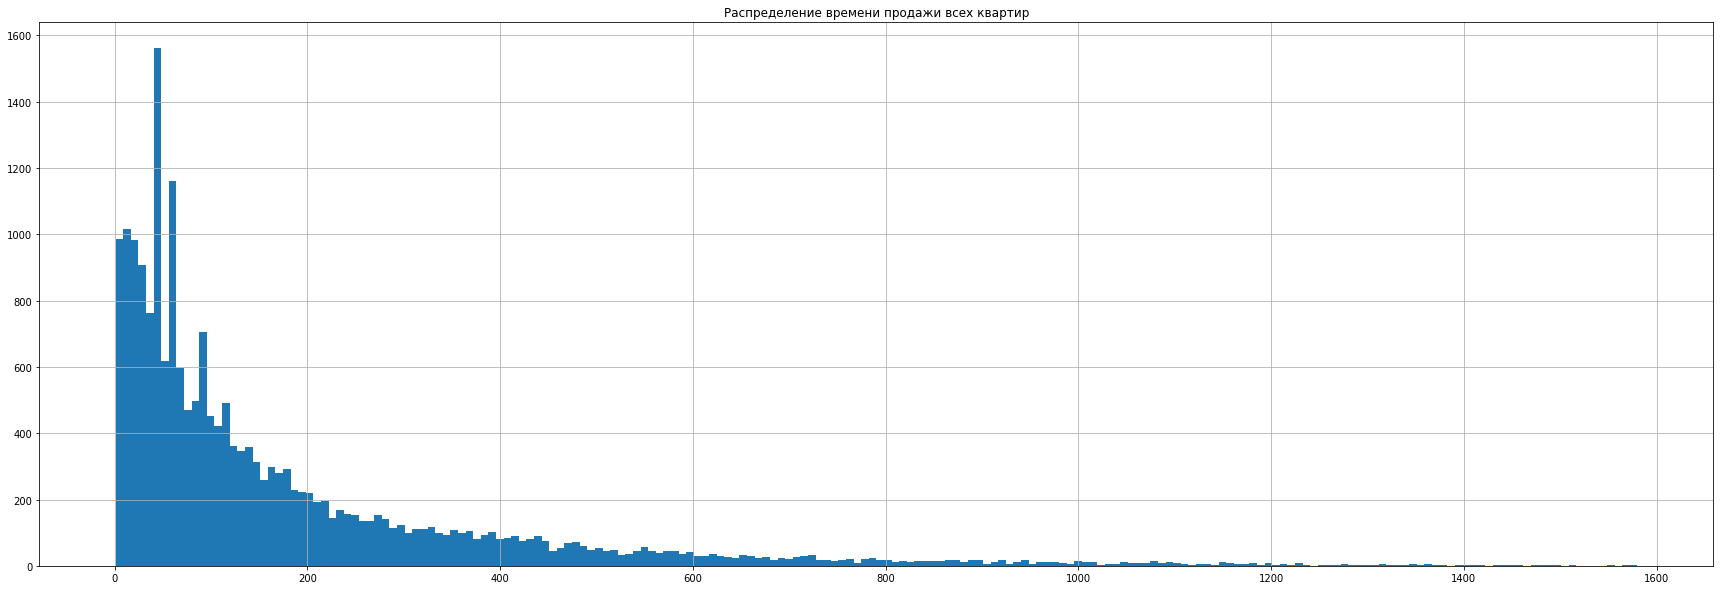

In [57]:
df.hist('days_exposition', bins=200, figsize=(30, 10))
plt.title('Распределение времени продажи всех квартир')
plt.show()

Определим дни с самым высоким количеством продаж квартир

In [58]:
result = df.pivot_table(index='days_exposition', 
                         values='first_day_exposition', 
                         aggfunc='count').sort_values(by='first_day_exposition', ascending=False)
print(result.head(20))

                 first_day_exposition
days_exposition                      
45.0                              880
60.0                              538
7.0                               234
30.0                              208
90.0                              204
4.0                               176
3.0                               158
5.0                               152
14.0                              148
9.0                               143
20.0                              139
8.0                               139
44.0                              138
11.0                              135
18.0                              129
13.0                              128
10.0                              127
28.0                              126
15.0                              126
22.0                              125


Медиана почти в 2 раза меньше среднего значения. Стандартное отклонение составляет 219.727988, что больше среднего значения. Скорее всего на среднее значение влияют долгие продажи квартир, самая длительная продажа составила почти 4,5 лет!
Большинство квартир продается не более чем за 200дней. Наблюдаем несколько выбросовю
Предлагаю считать, что быстрыми можно назвать продажи, составляющие меньше 95 дней.

В основном квартиры продаются за полтора- два месяца.

### Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - количество комнат;
  - тип этажа, на котором расположена квартира (первый, последний, другой);
  - дата размещения (день недели, месяц, год).

### Общая площадь


In [59]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Опять же, свехрбольшие квартиры влияют на среднюю площадь объектов недвижимости. Среднаяя площадь квартиры составляет 60,3 кв метра, а медианная 50 кв метров.

In [60]:
df['total_area'].max()

900.0

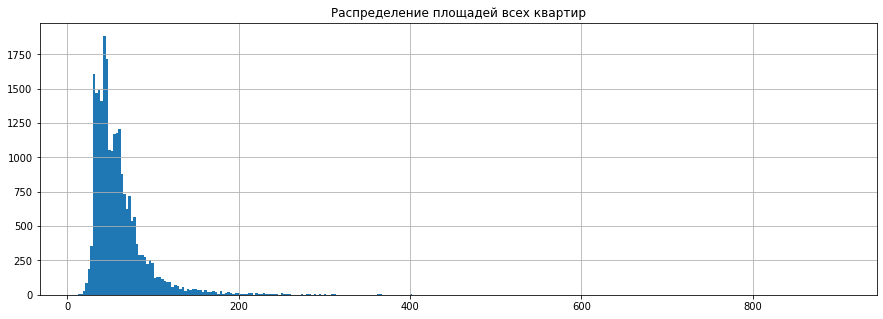

In [61]:
df.hist('total_area', bins=300, figsize=(15,5)) 
plt.title('Распределение площадей всех квартир')
plt.show()

Посмотрим на квартиры до 200 кв метров.


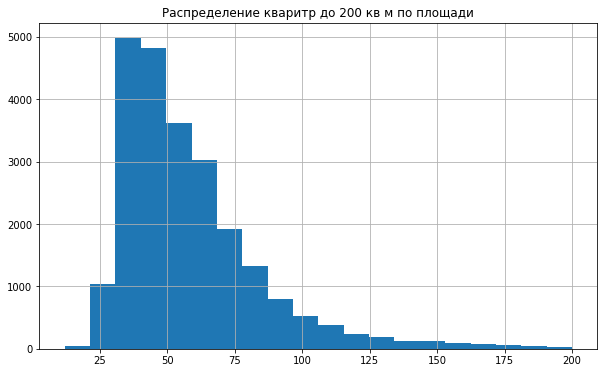

In [62]:
total_area_filtered = df[df['total_area'] <= 200]

# Настройка графика
plt.figure(figsize=(10, 6))
total_area_filtered['total_area'].hist(bins=20)
plt.title('Распределение кваритр до 200 кв м по площади')
plt.show()

Самое большое количество квартир как раз составляет где-то 50 кв метров. Это модет быть связано с тем, что такоц площади могут быть однокомнатные и двухкомнатные квартиры.

### Рассмотрим жилую площадь


In [63]:
df['living_area'].describe()

count    23699.000000
mean        34.233501
std         21.560038
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

Наблюдается такая же ситуация как и с общей площадью квартир. Медиана меньше среднего значения, а еще у нас очень высокое стандратное отклонение.



#### Строим гистограмму

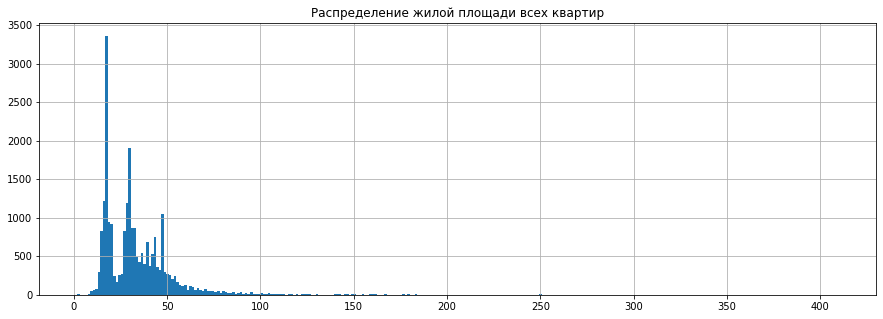

In [64]:
df.hist('living_area', bins=300, figsize=(15,5)) 
plt.title('Распределение жилой площади всех квартир')
plt.show()

In [65]:
# Расчет доли
total_apartments = 1
if total_apartments > 0:
    share_above_200 = len(df[df['total_area'] > 200])/len(df)
else:
    share_above_200 = 0

print(share_above_200)

0.009578463226296468


Квартир с площадью более 200 метров очень мало, удалим их.

In [66]:
df = df[df['total_area'] <= 200]
df['total_area'].sort_values().tail(20)

22025    195.7
9392     195.7
2756     196.0
7131     196.0
20715    196.0
22420    196.0
2709     197.0
3365     197.0
12922    197.0
18790    197.2
18391    197.9
11438    198.0
10315    198.0
16656    198.1
6509     198.9
15079    199.2
12055    200.0
679      200.0
3440     200.0
8355     200.0
Name: total_area, dtype: float64

In [67]:
df[['total_area', 'last_price', 'days_exposition', 'one_meter_price']].describe()

,total_area,last_price,days_exposition,one_meter_price
count,23472.000000,23472.000000,20343.000000,23472.000000
mean,58.179801,6.026304,179.719117,98.438386
std,26.531909,6.237847,218.331466,45.687088
min,12.000000,0.012190,1.000000,0.111835
25%,40.000000,3.400000,45.000000,76.500000
50%,51.900000,4.600000,95.000000,94.855305
75%,68.925000,6.700000,230.000000,113.888889
max,200.000000,330.000000,1580.000000,1736.842105


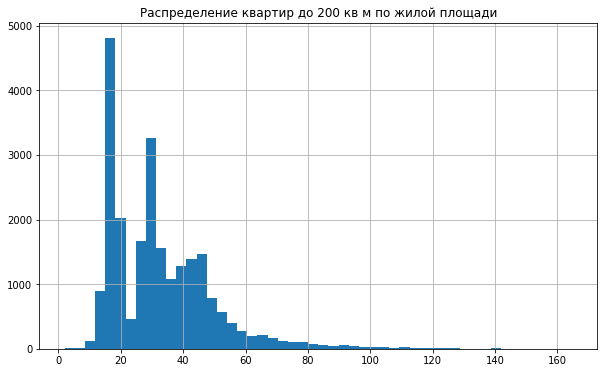

In [68]:
total_area_filtered = df[df['living_area'] <= 200]

# Настройка графика
plt.figure(figsize=(10, 6))
total_area_filtered['living_area'].hist(bins=50)
plt.title('Распределение квартир до 200 кв м по жилой площади')
plt.show()

Наблюдается 2 пика у жилой площади: 10-20 кв метров и 30-40 кв метров, подозреваю, что это связано с самыми популярными планировками квартир.

### Площадь кухни


In [69]:
df['kitchen_area'].describe()

count    23287.000000
mean        10.223870
std          5.208434
min          0.000000
25%          7.200000
50%          9.040000
75%         11.360000
max         93.200000
Name: kitchen_area, dtype: float64

Среднее значение и медианное достаточно близки, а стандартная ошибка среднего все еще велика, но не так как для общей и жилой площади.

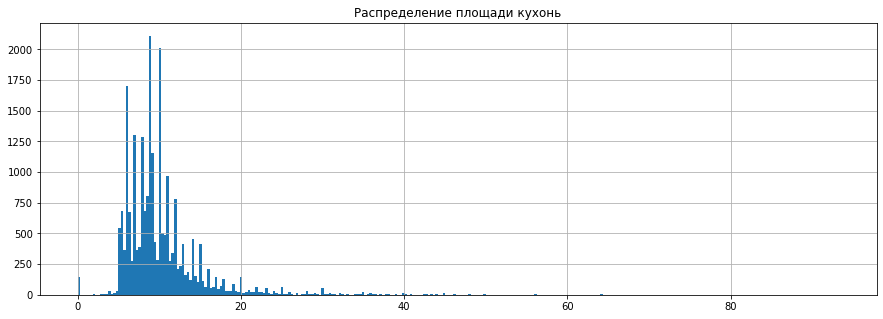

In [70]:
df.hist('kitchen_area', bins=300, figsize=(15,5)) 
plt.title('Распределение площади кухонь')
plt.show()

Результаты ожидаемы и соизмеримы с общей площадью и жилой. Но мы видим "столбик" на 0. Это связано с тем, что многие объекты - это студии, которые не имеют отдельно выделенной кухни

### Стоимость объекта


In [71]:
df['last_price'].describe()

count    23472.000000
mean         6.026304
std          6.237847
min          0.012190
25%          3.400000
50%          4.600000
75%          6.700000
max        330.000000
Name: last_price, dtype: float64

Среднее и медианное значение близки, стандартная ошибка среднего всё равно велика

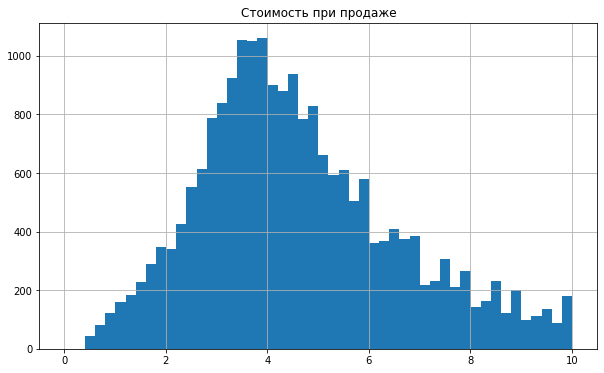

In [72]:
last_price_filtered = df[df['last_price'] <= 10] #Потому что большая часть квартир стоит до 10 млн

# Настройка графика
plt.figure(figsize=(10, 6))
last_price_filtered['last_price'].hist(bins=50)
plt.title('Стоимость при продаже')
plt.show()

В целом много квартир стоимостью ддо 5 млн. руб.

### Количество комнат


In [73]:
df['rooms'].describe()

count    23472.000000
mean         2.034211
std          0.996469
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

История повторяется.

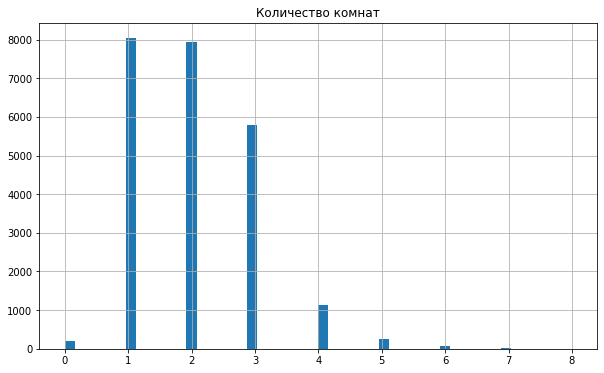

In [74]:
rooms_filtered= df[df['rooms'] <= 10]

# Настройка графика
plt.figure(figsize=(10, 6))
rooms_filtered['rooms'].hist(bins=50)
plt.title('Количество комнат')
plt.show()

Однушки и двушки, ничего удивительного

### Высота потолков


In [75]:
df['ceiling_height'].describe()

count    23472.000000
mean         2.693808
std          0.232842
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.300000
Name: ceiling_height, dtype: float64

In [76]:
print(df['ceiling_height'].sort_values().tail(20))

11651     4.4
6802      4.5
2823      4.5
14519     4.5
13224     4.5
10159     4.5
3067      4.5
19142     4.7
2802      4.8
1053      5.0
12628     5.3
7578      5.5
21227     5.8
20264     6.0
17442     8.0
3474      8.0
15743     8.0
5863      8.3
22869    10.0
22309    10.3
Name: ceiling_height, dtype: float64


1053     5.0
12628    5.3
7578     5.5
21227    5.8
20264    6.0
Name: ceiling_height, dtype: float64


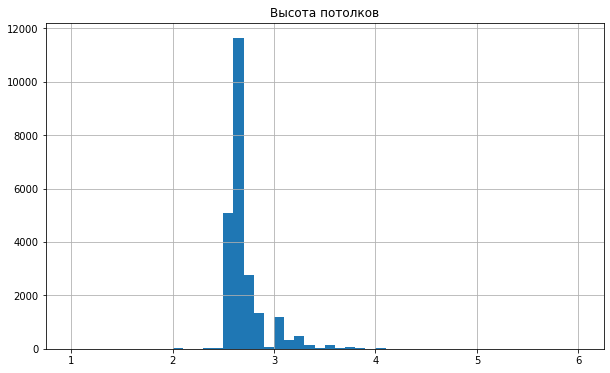

In [77]:
df = df[df['ceiling_height'] <= 6]
print(df['ceiling_height'].sort_values().tail())

# Настройка графика
plt.figure(figsize=(10, 6))
df['ceiling_height'].hist(bins=50)
plt.title('Высота потолков')
plt.show()

В основном встречаются потолки 2,6-2,7 метров, высокие потолки свойственны старому фонду.

### Тип этажа квартиры («первый», «последний», «другой»);


In [78]:
floor_filtered= df['floor_type'].value_counts()
print(floor_filtered)

другой       17292
последний     3271
первый        2903
Name: floor_type, dtype: int64


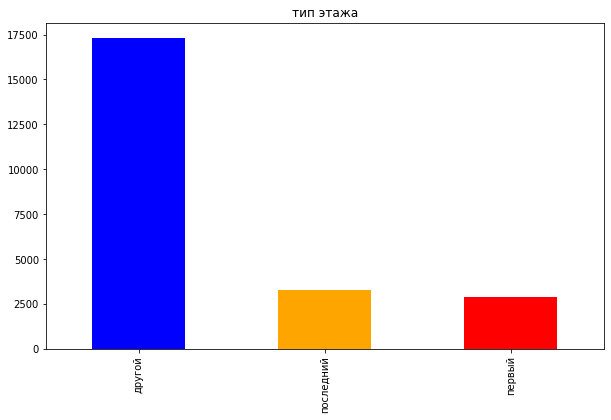

In [79]:
plt.figure(figsize=(10, 6))
floor_filtered.plot(kind='bar', color=['blue', 'orange', 'red'])
plt.title('тип этажа')
plt.show()

### Общее количество этажей в доме


In [80]:
df['floor'].describe()

count    23466.000000
mean         5.901688
std          4.894298
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

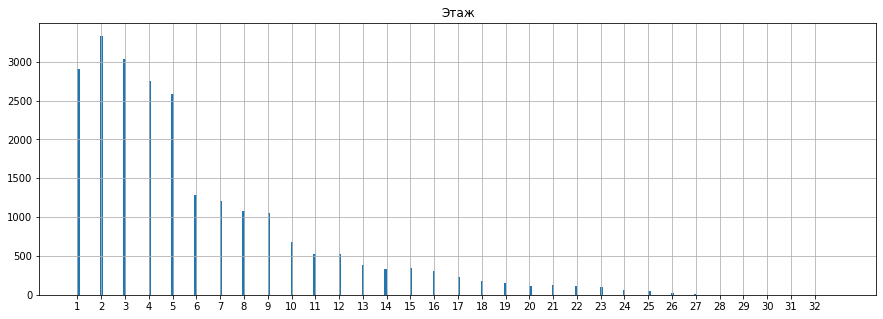

In [81]:
df.hist('floor', bins=300, figsize=(15,5))
plt.xticks(range(1, df['floor'].max()))  
plt.title('Этаж')
plt.show()

больше всего квартир до 6 этажа в продаже, наверное на это влияет огромное количество хрущовок на рынке недвижимости.

### Расстояние до центра города в метрах


In [82]:
df['city_centers_nearest_m'].describe()

count    17952.000000
mean     14280.206774
std       8594.532989
min        181.000000
25%       9425.000000
50%      13150.000000
75%      16333.000000
max      65968.000000
Name: city_centers_nearest_m, dtype: float64

Можно предположить, что большинством объектов находится в спальном районе Санкт-Петербурга.

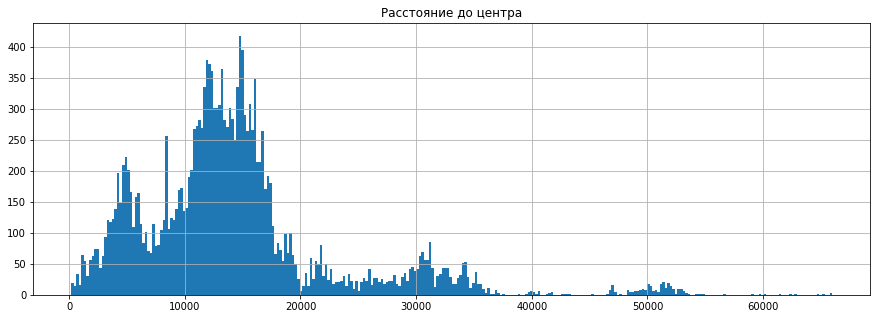

In [83]:
df.hist('city_centers_nearest_m', bins=300, figsize=(15,5)) 
plt.title('Расстояние до центра')
plt.show()

Наблюдается выброс, я думала, что это мои средние значения, но это не так, после 10000 метров - это скорее всего уже пригрод, очень много объектов в Ленинградской области.

In [84]:
top_distances = df['city_centers_nearest_m'].value_counts()
print(top_distances)

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
12747.0     1
8767.0      1
29890.0     1
9884.0      1
4234.0      1
Name: city_centers_nearest_m, Length: 7560, dtype: int64


Это видимо медианное значение выбивается, которым я заполнила пропуски.

### Расстояние до ближайшего парка

In [85]:
df['parks_nearest_km'].describe()

count    7928.000000
mean        0.492016
std         0.343067
min         0.001000
25%         0.288000
50%         0.456000
75%         0.613000
max         3.190000
Name: parks_nearest_km, dtype: float64

У нас очень много парковых зон в СПб и ЛО.

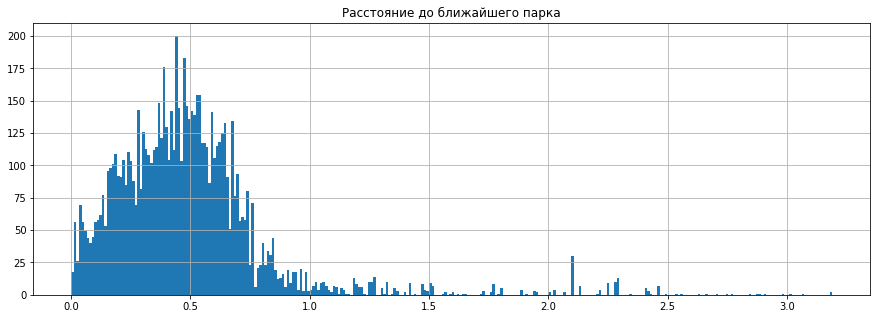

In [86]:
df.hist('parks_nearest_km', bins=300, figsize=(15,5)) 
plt.title('Расстояние до ближайшего парка')
plt.show()

В основном все парки рядышком с домами, это здорово!

### Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - количество комнат;
  - тип этажа, на котором расположена квартира (первый, последний, другой);
  - дата размещения (день недели, месяц, год).

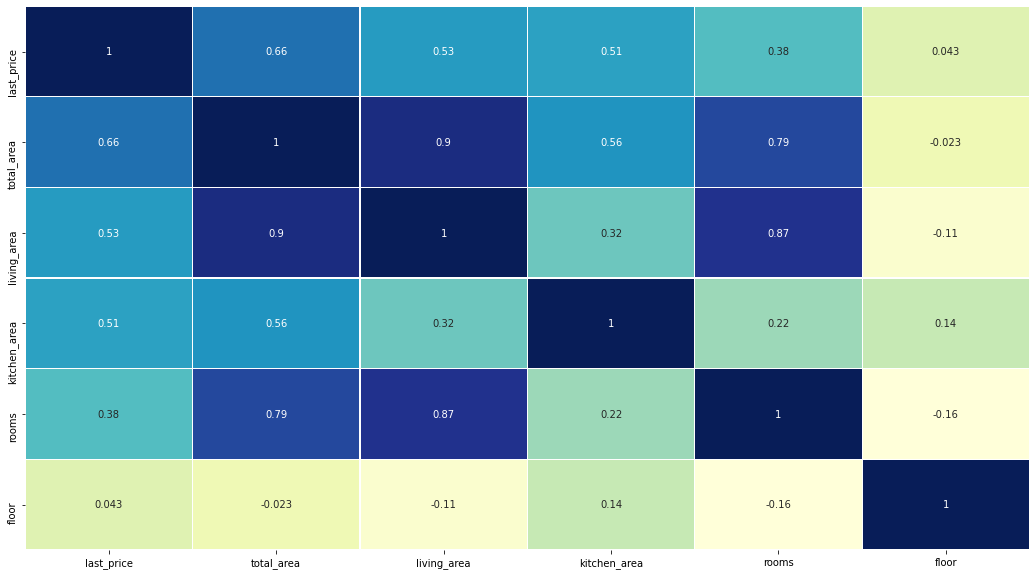

In [87]:
 # посмотрим на матрицу корреляции
plt.figure(figsize=(18, 10))
sns.heatmap(df[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor']].corr(), annot=True, cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.show()


Наблюдается умеренная корреляция между стоимостью недвижимости и общей площадью объектов недвижимости, также видна корреляция между жилой плозаью и стоимостью и площадью кухни. А вот зависимости стоимости от даты не наблюдается. Возможно даже стоимость в теченние года уменьшилась чуть-чуть.

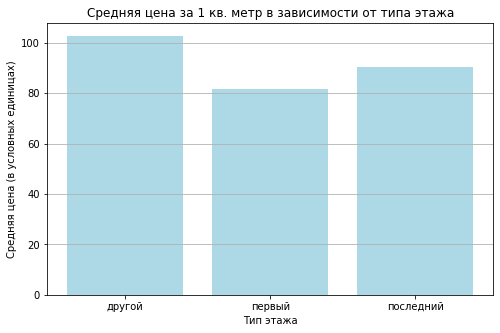

In [88]:
# Расчет средней цены за квадратный метр по типу этажа
average_price_by_floor_type = df.groupby('floor_type')['one_meter_price'].mean().reset_index()

# Построение графика
plt.figure(figsize=(8, 5))  # Размер графика

plt.bar(average_price_by_floor_type['floor_type'], average_price_by_floor_type['one_meter_price'], color='lightblue')

plt.title('Средняя цена за 1 кв. метр в зависимости от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Средняя цена (в условных единицах)')  # Укажите правильную валюту или единицы измерения
plt.grid(axis='y')

plt.show()

В основном, первый этаж не в почете и влияет на стоимость недвижимости, далее люди не одобряют "последний" этаж. Остальные этажи более приемлемы для покупателей.

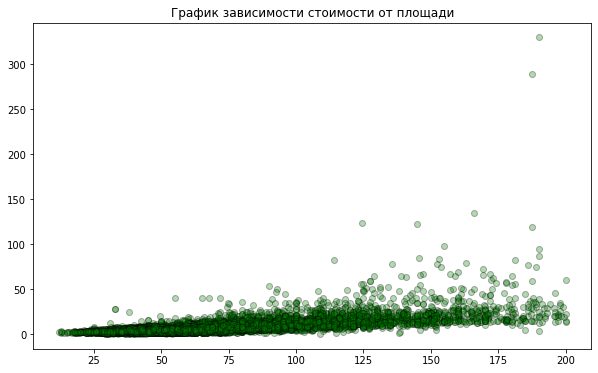

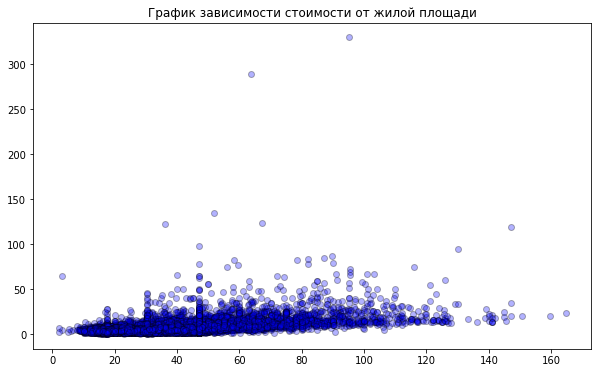

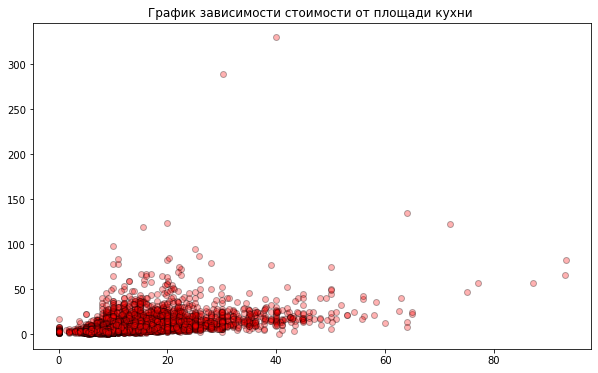

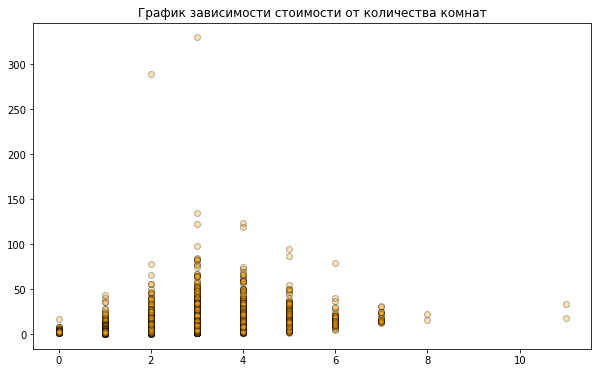

In [89]:
#Не тратим время, строим только графики, где видна будет корреляция
#один из них - это график зависимости площади от стоимости
plt.figure(figsize=(10, 6))
plt.scatter(df['total_area'], df['last_price'], color='green', alpha=0.3, edgecolor='k')
plt.title('График зависимости стоимости от площади')
plt.show()

#один из них - это график зависимости жилой площади от стоимости
plt.figure(figsize=(10, 6))
plt.scatter(df['living_area'], df['last_price'], color='blue', alpha=0.3, edgecolor='k')
plt.title('График зависимости стоимости от жилой площади')
plt.show()

#один из них - это график зависимости площади кухни от стоимости
plt.figure(figsize=(10, 6))
plt.scatter(df['kitchen_area'], df['last_price'], color='red', alpha=0.3, edgecolor='k')
plt.title('График зависимости стоимости от площади кухни ')
plt.show()

#один из них - это график зависимости количества комнат от стоимости
plt.figure(figsize=(10, 6))
plt.scatter(df['rooms'], df['last_price'], color='orange', alpha=0.3, edgecolor='k')
plt.title('График зависимости стоимости от количества комнат')
plt.show()

Наблюдается слабая зависимость.

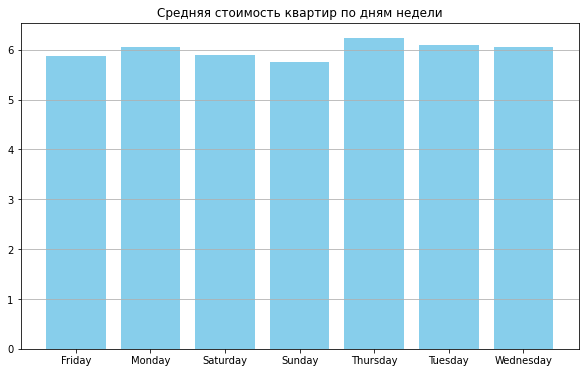

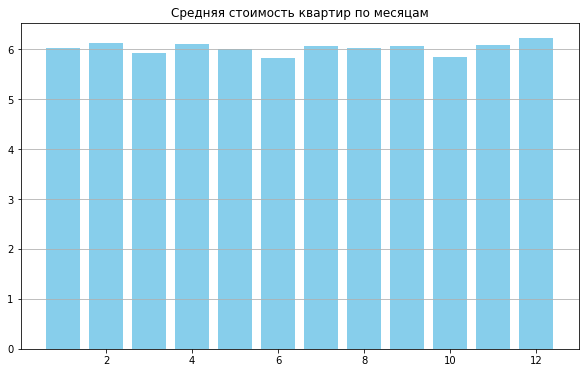

In [90]:
#График зависимости стоимости от дня недели
avg_price_by_day = df.groupby('day_of_week')['last_price'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_day['day_of_week'], avg_price_by_day['last_price'], color='skyblue')
plt.title('Средняя стоимость квартир по дням недели')
plt.grid(axis='y')
plt.show()

#График зависимости стоимости от месяца
avg_price_by_day = df.groupby('month')['last_price'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_day['month'], avg_price_by_day['last_price'], color='skyblue')
plt.title('Средняя стоимость квартир по месяцам')
plt.grid(axis='y')
plt.show()


Чаще всего квартиры выставляют на продажу в субботу, потому что это выходной день, наверное.
Чаще всего квартиры покупают в 4,7,9 и 12 месяц. Примерно в конец каждого квартала продажи растут.

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:
Выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [91]:
#уберем все наименования населенных пунктов, оставим только имена
def place_short(text):
    if isinstance(text, str):
        dict_places = [
            'деревня ', 
            'коттеджный поселок ', 
            'садовое товарищество ', 
            'поселок городского типа ', 
            'поселок при железнодорожной станции ', 
            'поселок станции ', 
            'городской поселок ', 
            'садоводческое некоммерческое товарищество ',
            'поселок имени ', 
            'поселок ', 
            'село '
        ]

        for i in dict_places:
            text = text.replace(i, '')
        return text   
    else:
        return text  # Возвращаем оригинальное значение, если это не строка

# Создаем столбец с укороченными названиями
df['locality_name_short'] = df['locality_name'].apply(place_short)

# Посмотрим, что получилось
print(df['locality_name_short'].tail(25))

23674    Санкт-Петербург
23675    Санкт-Петербург
23676    Санкт-Петербург
23677         Всеволожск
23678             Пушкин
23679       Сосновый Бор
23680    Санкт-Петербург
23681    Санкт-Петербург
23682             Выборг
23683       Дзержинского
23684    Санкт-Петербург
23685          Ломоносов
23686    Санкт-Петербург
23687    Санкт-Петербург
23688    Санкт-Петербург
23689    Санкт-Петербург
23690    Санкт-Петербург
23691    Санкт-Петербург
23692             Тихвин
23693           Петергоф
23694    Санкт-Петербург
23695              Тосно
23696        Рождествено
23697    Санкт-Петербург
23698        Новый Учхоз
Name: locality_name_short, dtype: object


In [92]:
#Найдем средние и медианные стоимости 1 квадратного метра недвижимости в населенных пунктах
average_price_per_sqm = df.groupby('locality_name_short')['one_meter_price'].median().reset_index()
average_price_per_sqm_md = average_price_per_sqm.sort_values(by='one_meter_price', ascending=False)
print('Распределение по медианной стоимости')
print(average_price_per_sqm_md.head(10))

average_price_per_sqm = df.groupby('locality_name_short')['one_meter_price'].mean().reset_index()
average_price_per_sqm_mn = average_price_per_sqm.sort_values(by='one_meter_price', ascending=False)
print('Распределение по средней стоимости')
print(average_price_per_sqm_mn.head(10))

Распределение по медианной стоимости
    locality_name_short  one_meter_price
222     Санкт-Петербург       104.634124
64          Зеленогорск       101.666667
201              Пушкин        99.993590
235          Сестрорецк        99.719036
116            Левашово        96.997691
105             Кудрово        95.675474
169           Парголово        91.780224
141           Мистолово        90.888889
254            Стрельна        87.988615
212              Репино        86.542208
Распределение по средней стоимости
    locality_name_short  one_meter_price
64          Зеленогорск       115.122799
222     Санкт-Петербург       113.525966
212              Репино       104.238615
201              Пушкин       103.122539
235          Сестрорецк       101.912339
122           Лисий Нос       100.660814
141           Мистолово        98.549977
116            Левашово        96.997691
105             Кудрово        95.324931
169           Парголово        90.332263


С горем пополам нашли медианные стоимости 1 квадратного метра недвижимости и ранжировали населенные пункты по медианной стоимости, а еще и по средней. 
По средней стоимости выходит, что 1кв метр в Зеленогорске стоит дороже, вероятно, потому что это курортный район.

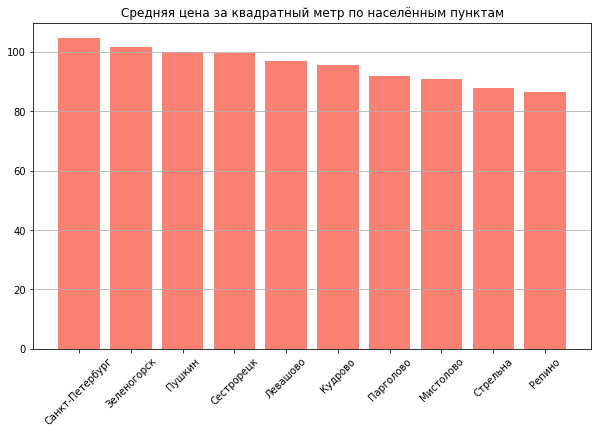

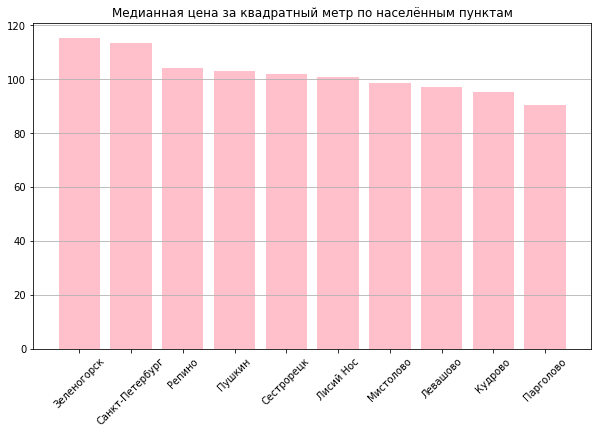

In [93]:
#Построим графики
plt.figure(figsize=(10, 6))

# Сортируем данные по цене за квадратный метр
sorted_data = average_price_per_sqm_md.sort_values(by='one_meter_price', ascending=False).head(10)

plt.bar(sorted_data['locality_name_short'], sorted_data['one_meter_price'], color='salmon')

plt.title('Средняя цена за квадратный метр по населённым пунктам')
plt.xticks(rotation=45)  # Поворачиваем метки на оси X для удобства чтения
plt.grid(axis='y')  # Добавляем решётку для оси Y

plt.figure(figsize=(10, 6))

# Сортируем данные по цене за квадратный метр
sorted_data = average_price_per_sqm_mn.sort_values(by='one_meter_price', ascending=False).head(10)

plt.bar(sorted_data['locality_name_short'], sorted_data['one_meter_price'], color='pink')

plt.title('Медианная цена за квадратный метр по населённым пунктам')
plt.xticks(rotation=45)  # Поворачиваем метки на оси X для удобства чтения
plt.grid(axis='y')  # Добавляем решётку для оси Y

# Показываем график
plt.show()

### Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра

In [94]:
# Строим сводную таблицу для вычисления средней стоимости недвижимости в Санкт-Петербурге
average_price_piv = df.pivot_table(values='last_price', index='city_centers_nearest_m', columns='locality_name_short', aggfunc='mean')
average_price_petersburg_1 = average_price_piv['Санкт-Петербург'].reset_index().sort_values(by='city_centers_nearest_m', ascending=True)
print(average_price_petersburg_1)

      city_centers_nearest_m  Санкт-Петербург
0                      181.0           31.099
1                      208.0            5.800
2                      215.0           10.990
3                      287.0            9.590
4                      291.0           11.500
...                      ...              ...
7540                 64857.0              NaN
7541                 65105.0              NaN
7542                 65764.0              NaN
7543                 65952.0              NaN
7544                 65968.0              NaN

[7545 rows x 2 columns]


In [95]:
# Строим сводную таблицу для вычисления средней стоимости 1 кв метра недвижимости в Санкт-Петербурге
average_price_piv = df.pivot_table(values='one_meter_price', index='city_centers_nearest_m', columns='locality_name_short', aggfunc='mean')
average_price_petersburg_2 = average_price_piv['Санкт-Петербург'].reset_index().sort_values(by='city_centers_nearest_m', ascending=True).head(20)
print(average_price_petersburg_2)

    city_centers_nearest_m  Санкт-Петербург
0                    181.0       195.591195
1                    208.0       172.619048
2                    215.0       109.900000
3                    287.0        88.796296
4                    291.0       101.321586
5                    318.0       423.999624
6                    329.0       100.000000
7                    376.0       137.755102
8                    387.0       139.318885
9                    392.0       200.348432
10                   399.0       122.764977
11                   410.0        75.471698
12                   423.0       149.623236
13                   467.0        91.649200
14                   472.0       144.957983
15                   515.0       117.283951
16                   537.0       212.418301
17                   552.0       147.000000
18                   573.0       225.806452
19                   583.0       239.583333


In [96]:
average_price_piv = df.pivot_table(values='one_meter_price', 
                                     index='city_centers_nearest_m', 
                                     columns='locality_name_short', 
                                     aggfunc='mean')

# Фильтруем только для Санкт-Петербурга
average_price_petersburg = average_price_piv['Санкт-Петербург'].reset_index().sort_values(by='city_centers_nearest_m', ascending=True)

# Вычисляем корреляцию
correlation = average_price_petersburg['city_centers_nearest_m'].corr(average_price_petersburg['Санкт-Петербург'])

# Выводим результаты
print("Средние цены 1 кв метра в Санкт-Петербурге на разных расстояниях от центра:")
print(average_price_petersburg)

# Выводим корреляцию
print(correlation)

Средние цены 1 кв метра в Санкт-Петербурге на разных расстояниях от центра:
      city_centers_nearest_m  Санкт-Петербург
0                      181.0       195.591195
1                      208.0       172.619048
2                      215.0       109.900000
3                      287.0        88.796296
4                      291.0       101.321586
...                      ...              ...
7540                 64857.0              NaN
7541                 65105.0              NaN
7542                 65764.0              NaN
7543                 65952.0              NaN
7544                 65968.0              NaN

[7545 rows x 2 columns]
-0.3042566119301792


### Посмотрим, есть ли зависимость для стоимости однокомнатных квартир от расстояния до центра

Средние цены однокомнатных квартир в Санкт-Петербурге на разных расстояниях от центра:
locality_name_short  city_centers_nearest_m  Санкт-Петербург
0                                     208.0            5.800
1                                     392.0           11.500
2                                     583.0           11.500
3                                     964.0            2.400
4                                    1146.0            5.700
...                                     ...              ...
2672                                26027.0            4.150
2673                                26286.0            2.600
2674                                27431.0            2.250
2675                                28018.0            3.717
2676                                29493.0            2.450

[2677 rows x 2 columns]
-0.3691198090743602


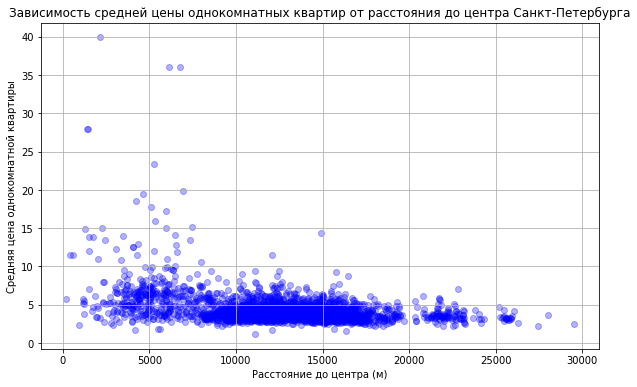

In [97]:
df_one_room = df[(df['rooms'] == 1) & (df['locality_name_short'] == 'Санкт-Петербург')]

# Строим сводную таблицу для вычисления средней стоимости, потом вычислим корреляцию
average_price_piv = df_one_room.pivot_table(values='last_price', 
                                             index='city_centers_nearest_m', 
                                             columns='locality_name_short', 
                                             aggfunc='mean')

# Фильтруем только для Санкт-Петербурга
average_price_petersburg = average_price_piv.reset_index().sort_values(by='city_centers_nearest_m', ascending=True)
correlation = average_price_petersburg['city_centers_nearest_m'].corr(average_price_petersburg['Санкт-Петербург'])
print('Средние цены однокомнатных квартир в Санкт-Петербурге на разных расстояниях от центра:')
print(average_price_petersburg)
print(correlation)


plt.figure(figsize=(10, 6))
plt.scatter(
    average_price_petersburg['city_centers_nearest_m'],
    average_price_petersburg['Санкт-Петербург'],
    alpha=0.3,
    marker='o',
    color='blue'
)
plt.title('Зависимость средней цены однокомнатных квартир от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра (м)')
plt.ylabel('Средняя цена однокомнатной квартиры')
plt.grid()
plt.show()

Наблюдается отрицательная слабая корреляция между стоимостью однокомнатных квартир и расстоянием от центра (чем дальше, тем дешевле)

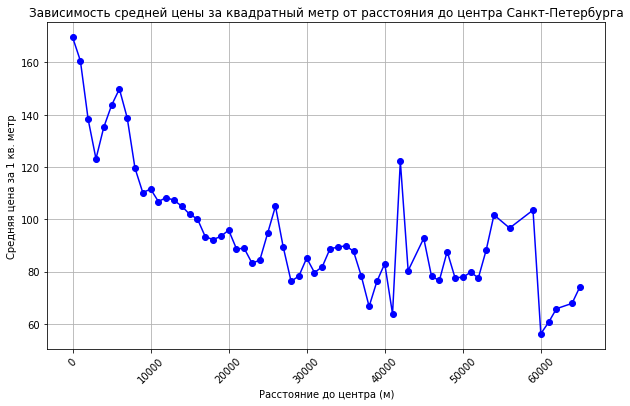

In [98]:
# Преобразуем расстояние в километры
df['distance_km'] = df['city_centers_nearest_m'] / 1000

# Группируем данные по расстоянию и считаем среднюю цену
average_price_by_distance = df.groupby(df['city_centers_nearest_m'] // 1000 * 1000)['one_meter_price'].mean().reset_index()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(average_price_by_distance['city_centers_nearest_m'],
         average_price_by_distance['one_meter_price'], linestyle='-', marker='o', color='blue')

plt.title('Зависимость средней цены за квадратный метр от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра (м)')
plt.ylabel('Средняя цена за 1 кв. метр') 
plt.xticks(rotation=45)
plt.grid()


Удаленность от центра влияет на стоимость квадратного метра

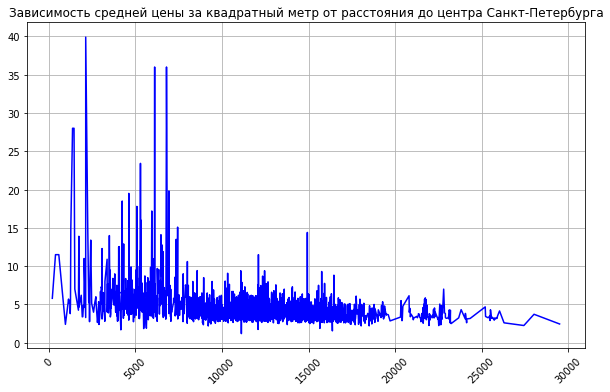

In [99]:
#Построим графики зависимости средней цены за 1 кв метр, попробуем визуализировать графики разными способами
plt.figure(figsize=(10, 6))
plt.plot(average_price_petersburg['city_centers_nearest_m'],
         average_price_petersburg['Санкт-Петербург'], linestyle='-', color='blue')

plt.title('Зависимость средней цены за квадратный метр от расстояния до центра Санкт-Петербурга')
plt.xticks(rotation=45)
plt.grid()

# Показываем график
plt.show()

### Средняя стоиомсть квадратного метра, если объект является апартаментами и не является

In [100]:

pivot_table = df.pivot_table(index='is_apartment', values='one_meter_price', aggfunc='mean')
pivot_table.index = ['Апартаменты (True)', 'Не апартаменты (False)']
print(pivot_table)

                        one_meter_price
Апартаменты (True)            97.823088
Не апартаменты (False)        98.495369


В историческом центре в основном наблюдаются большие пики, следовательно, можно считать, что в центре недвижимость дороже, чем в не в центре. Можно увидеть увеличение пиков стоимость квартир в промежутке от 5 до 10 км, думаю это как раз спальный район Санкт-Петербурга. А вот на 5 км - стоимость невелика, потому что и квартир маловато, так как это старая промышленная зона города.

Наблюдается отрицательная слабая корреляция, это значит, что чем дальше от центра, тем меньше становится стоимость 1 кв метра.

Напрямую видимо приближенность к центру не так сильно влияет, потому что к продаже выставляются квартиры разной площадью, это может сильно влиять на конечный результат. Попробуем рассмотреть однокомнатные квартиры.

## Пишем выводы

в рамках данного проекты мы проанализировали полученные данные о недвижимости в Санкт-Петербурге. Были проанализировагы и изучены данные для анализа, выполнена их предобработка. Далее
переименовани и поправлены наименования столбцов, заполнены некоторые промежутки/пропуски, которых оказалось очень много.

Популярной площадью была площадь квартир в среднем до 60 кв метров, наиболее часто попадались объекты на этажах до 5 включительно.

Были обнаружены пики продажи на 45, 60, 30 и 90 дни. Вероятно это связано с обновлением публикаций для того, чтобы поднять объявление в поисковой ленте. Поэтому трудно сказать, сколько же дней в реальности провисело то или иное объявление.
Проанализировав данные можно сделать первый вывод, что на стоимость недвижимости влияет расстояние до центра города, возможным исключением может являться только город Зеленогорск, возможно потому что это курортный район. Кроме того, очевидный факт - на стоимость влияет общая площадь недвижимости. Выявлено, что на стоимость недвижимости в основном влияют следующие параметры:
    -общая площадь
    -жилая площадь
    -площадь кухни
    
Остальные показатели имеют не такую внятную корреляцию. 
Еще на среднюю цену одного квадратного метра влияет и этаж объекта недвижимости.
Больше всего продаются однокомнатные квартиры, их в продаже больше всего. 
В июне стоимость квартир немного снижается, к зиме повышается.
Чаще всего объявления выставляют по субботам, в нерабочий день.
В пригородах Санкт-Петербурга стоимость квадратного метра недвижимочти чуть ниже.
Еще тип недвижимости тоже может влиять на стоимость. Жилая недвижимость, в среднем, дороже.
В дальнейшем следует учитывать и вид жилья: новостройка или вторичка, расстояние от метро, удобство инфраструктуры и тд. 

Хочется отметить, что многие факторы влияют сильнее на стоимость, другие меньше, очень важно в таком случае оценивать "вес" каждого параметра.
Сейчас мы просто констатировали уже известные факты.
Еще рекомендуется унифицировать правила ввода наименований населенных пунктов.
    


### Подсказки

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – +цена одного квадратного метра;
       – +день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – +месяц публикации объявления;
       – +год публикации объявления;
       – +тип этажа квартиры (значения — «первый», «последний», «другой»);
       – +расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - -общая площадь;
        --жилая площадь;
        - -площадь кухни;
        - -цена объекта;
        - -количество комнат;
        - -высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.